In [203]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, recall_score, make_scorer, auc, roc_curve, classification_report, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)



### Data Preparation

#### Data Cleaning 

In [204]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [205]:
# Get Dataset information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [206]:
# Get Data shape 

shape = df.shape 

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [207]:
# Check for Empty cells

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [208]:
# Check for Null Values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [209]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [210]:
# Get the Value Count of each Column

df.nunique().sort_values()


EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

#### Data Categorization

##### Redundancy Check

In [211]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].value_counts().nunique() == 1 :
        redundant_cols.append(col)
        
redundant_cols

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

In [212]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

len(df.columns)


31

##### Columns check

In [213]:
# Check for Numerical Columns 

numerical_cols = df.select_dtypes(include = 'number').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

23 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [214]:
# Check for Categorical Columns

nominal_cols = df.select_dtypes( include = ['object'] ).columns.tolist()

print(str( len(nominal_cols) ) + ' Nominal Categorical Columns \n \n' + str(nominal_cols) )

8 Nominal Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [215]:
# Get Ordinal categorical columns

ordinal_cols = df[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].columns.tolist()

print(str( len(ordinal_cols) ) + ' Ordinal Categorical Columns \n \n' + str(ordinal_cols) )

9 Ordinal Categorical Columns 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [216]:
# Encode Overtime and Attrition

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No' : 0})

df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

In [217]:
# Updated dataset size 

shape = df.shape 

print(f'The Dataset now has {shape[0]} Rows and {shape[1]} Columns after removing Redundancies')

The Dataset now has 1470 Rows and 31 Columns after removing Redundancies


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Exploratory Data Analysis

In [219]:
# Fuction to tabulate the relationship between a specified feature and Attrition
 
def Column_Attr(col):
    col_Attr = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    col_Attr.columns = ['No (0)', 'Yes (1)']
    print(f"\n{col} vs Attrition (%): \n")
    print(col_Attr)

#### General Correlation Analysis

In [220]:
# Copy and Encode df

df_copy = df.copy()

for col in ordinal_cols and numerical_cols and nominal_cols:
        df_copy[col] = LabelEncoder().fit_transform(df_copy[[col]])
        


In [221]:
df_copy.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


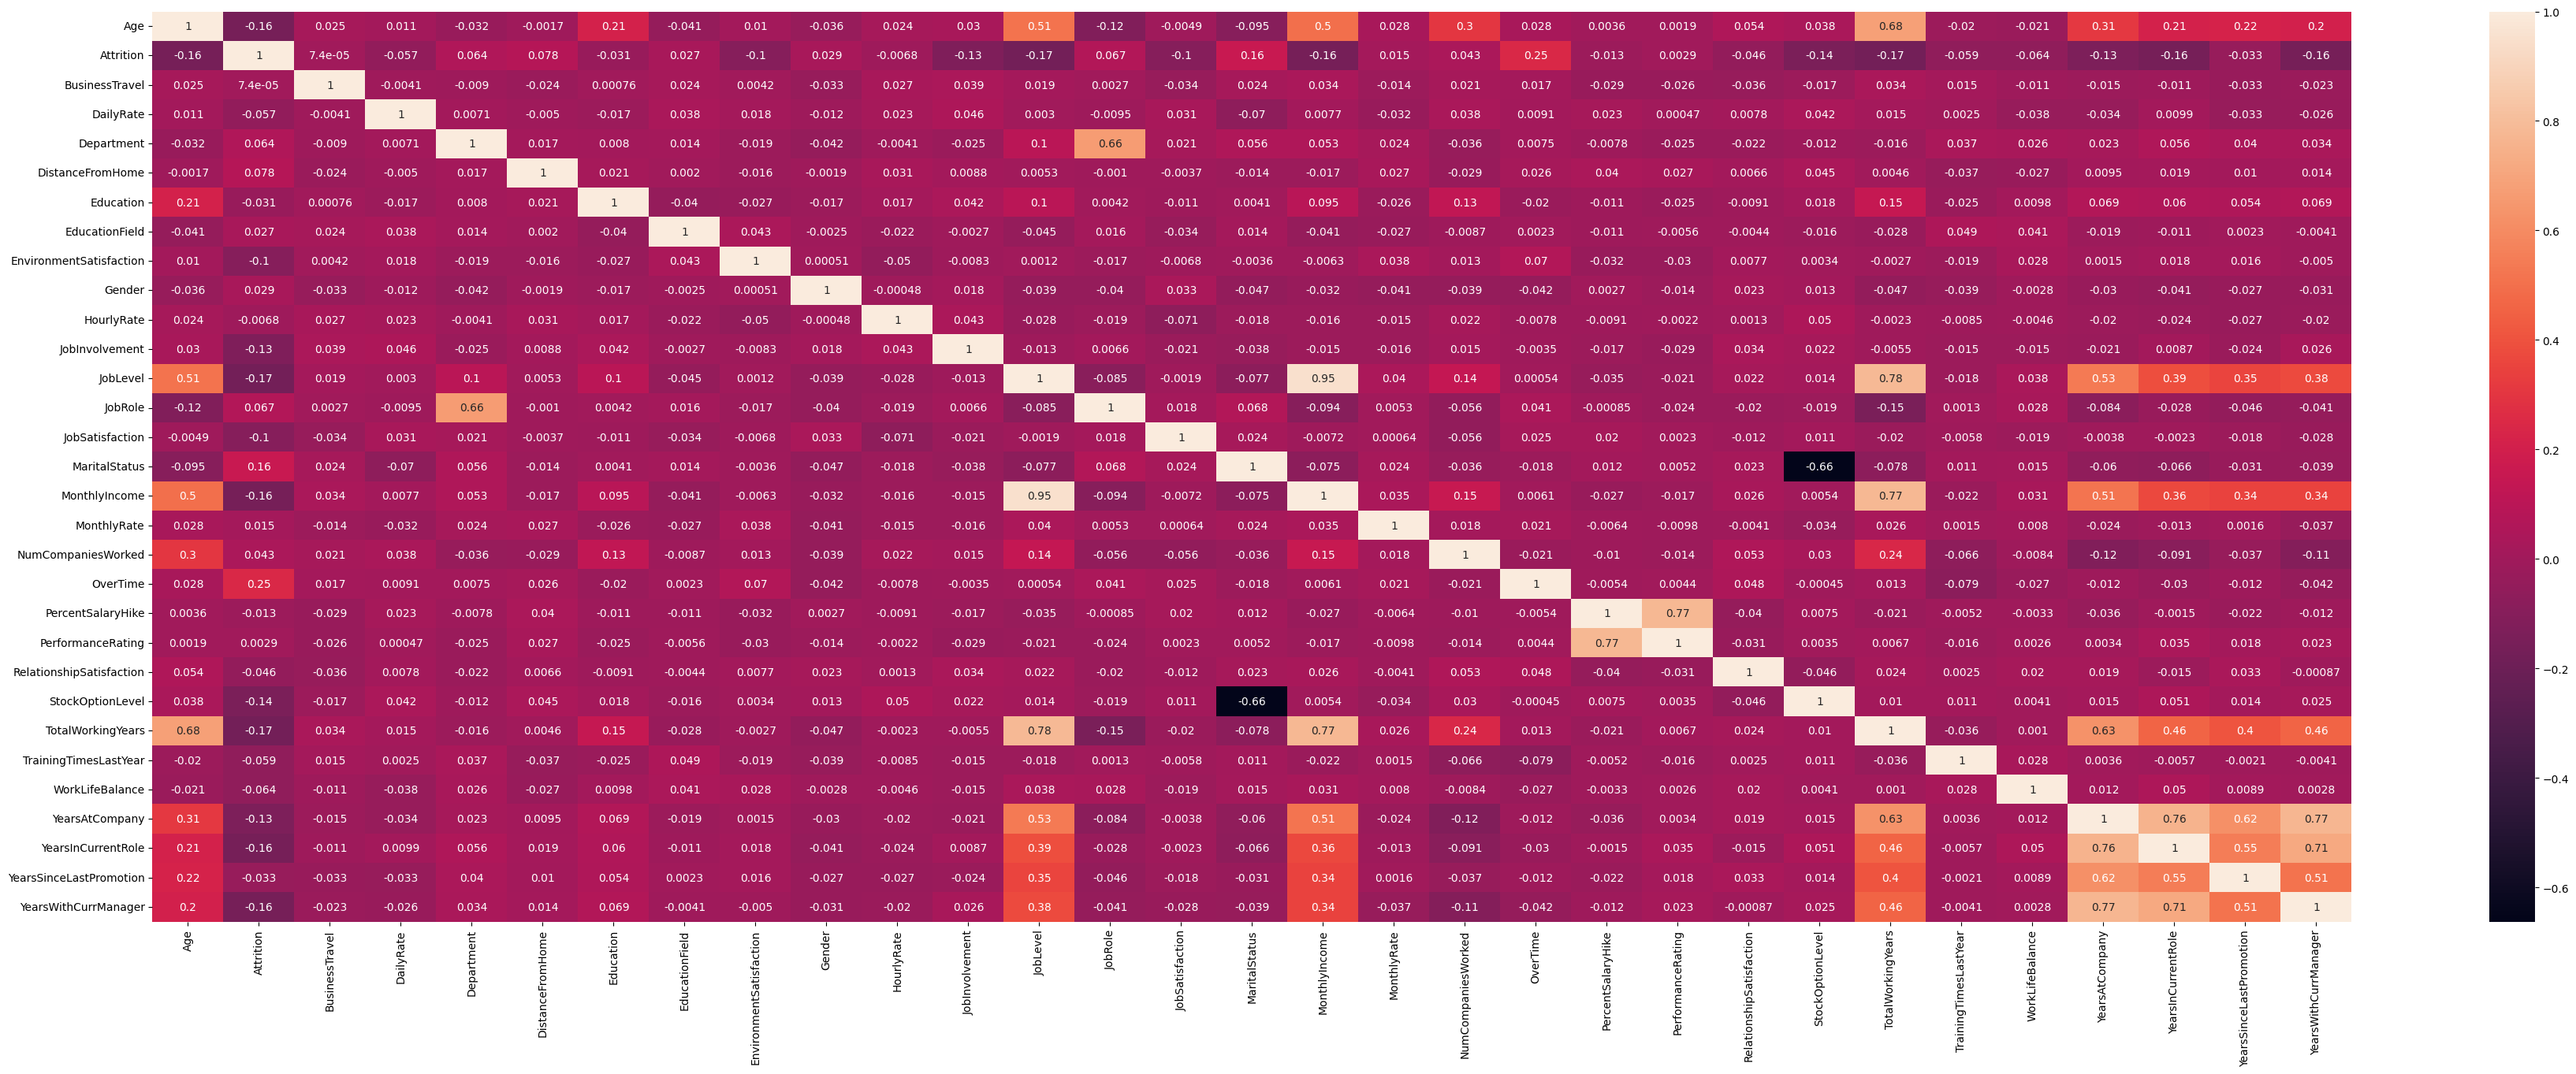

In [222]:
# Plot a correlation chart of df features 

df_encoded_corr = df_copy.corr()

plt.figure(figsize = (45, 15))

sns.heatmap(df_encoded_corr, annot = True)

plt.show()

In [223]:
# List out the correlation of each feature with Attrition

df_corr_list = df_encoded_corr['Attrition'].sort_values(ascending = True ).reset_index()

df_corr_list

,index,Attrition
0,TotalWorkingYears,-0.171063
1,JobLevel,-0.169105
2,YearsInCurrentRole,-0.160545
3,MonthlyIncome,-0.159840
4,Age,-0.159205
5,YearsWithCurrManager,-0.156199
6,StockOptionLevel,-0.137145
7,YearsAtCompany,-0.134392
8,JobInvolvement,-0.130016
9,JobSatisfaction,-0.103481


 From the `Correlation Chart of df`, it is evident that individually, none of the features linearly correlate highly with the target `Attrition` 

#### Attrition

In [224]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

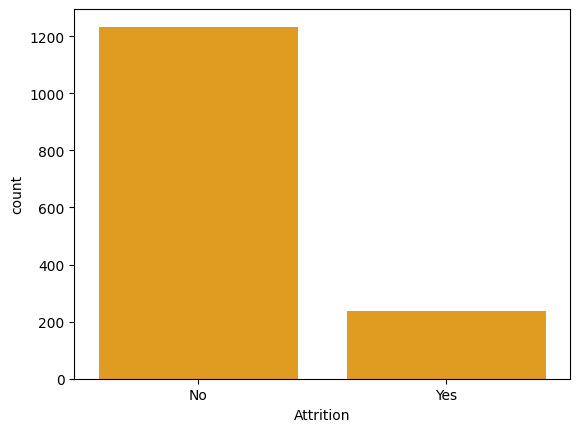

In [225]:
sns.countplot(data = df, x = 'Attrition', color = 'orange')

plt.xticks(ticks = [0,1], labels = ['No', 'Yes'])
plt.show()

**Insights**
- The chart clearly shows that employee retention is strong, with over `1200 individuals` staying in the company compared to just above `200` who left. 
- This suggests a healthy organizational climate overall, though the attrition group—while smaller—still warrants attention to uncover any underlying causes and prevent future turnover.

#### Age 

In [226]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

##### Univariate Analysis

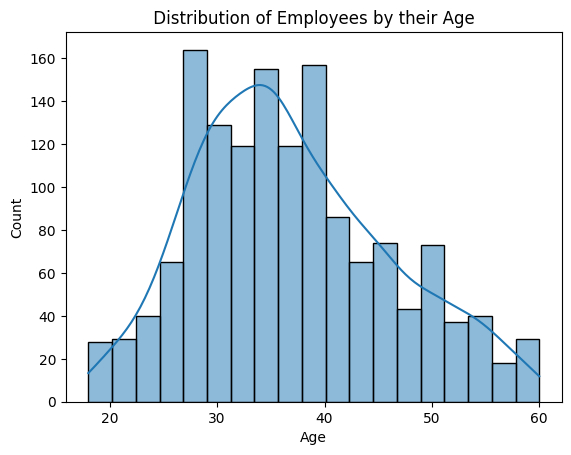

In [227]:
sns.histplot(data = df, x = 'Age', kde=True)

plt.title(' Distribution of Employees by their Age ')
plt.show()

**Insight**
- The employee age distribution peaks sharply between 30 and 35 years, indicating a workforce dominated by early-career professionals.  
- The overall bell-shaped curve suggests a balanced age spread, but with fewer employees at both younger and older extremes—ideal for succession planning and targeted development strategies.

##### Bivariate Analysis

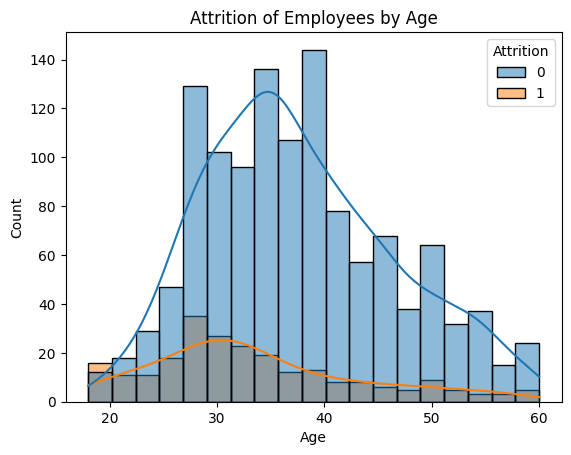

In [228]:
sns.histplot(data = df, x = 'Age', hue ='Attrition', kde=True)

plt.title('Attrition of Employees by Age')
plt.show()

In [229]:
Age_group = pd.cut(df['Age'], bins = [18, 20, 30, 40, 50, 60 ], labels = ['18 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])

Age_group

0       41 - 50
1       41 - 50
2       31 - 40
3       31 - 40
4       21 - 30
         ...   
1465    31 - 40
1466    31 - 40
1467    21 - 30
1468    41 - 50
1469    31 - 40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['18 - 20' < '21 - 30' < '31 - 40' < '41 - 50' < '51 - 60']

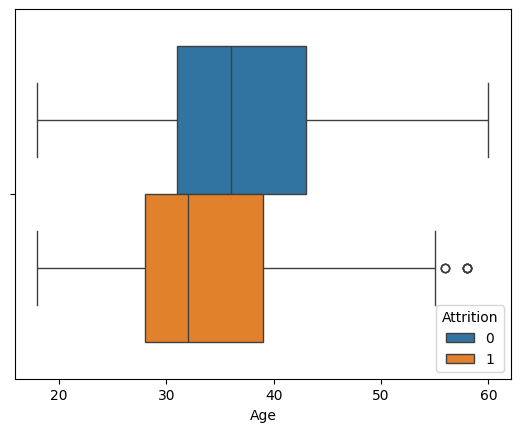

In [230]:
# Check for outliers 

sns.boxplot(data = df, x = 'Age', hue ='Attrition')

plt.show()

**Insight**
- The plot reveals that employee attrition is most prevalent among younger age groups, particularly between 25 and 35 years. 
- As age increases, the likelihood of attrition decreases significantly, suggesting older employees tend to stay longer. 
- This insight highlights a potential need for targeted retention strategies for younger staff to reduce turnover and maintain workforce stability

#### Business Travel

In [231]:
Business_Travel = df['BusinessTravel'].value_counts()

Business_Travel.reset_index()

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


##### Univariate Analysis : Distribution by Business Travel Categories

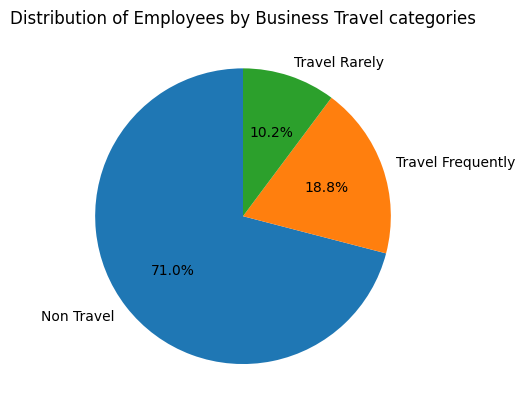

In [232]:
# Distribution of Employees by Business Travel categories 

labels = ['Non Travel', 'Travel Frequently', 'Travel Rarely']

plt.pie(Business_Travel, labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Employees by Business Travel categories')
plt.show()

**Insights**
- The pie chart reveals a strong preference for non-travel among the group, with 71% not traveling at all. 
- Only 29% engage in travel, split between frequent (18.8%) and rare (10.2%) travelers. 
- This suggests that travel-related programs or benefits may only appeal to a minority, and remote or location-stable roles likely align well with the majority’s lifestyle.

##### Bivariate Analysis : Attrition by Business Travel categories


BusinessTravel vs Attrition (%): 

                      No (0)    Yes (1)
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


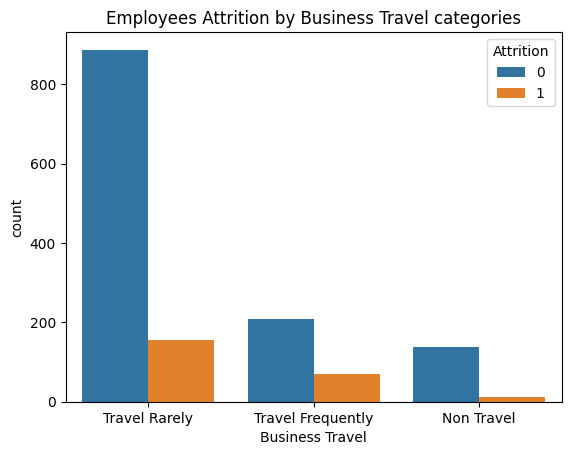

In [233]:
Column_Attr('BusinessTravel')

sns.countplot(data = df, x = 'BusinessTravel' , hue = 'Attrition' )
plt.title('Employees Attrition by Business Travel categories')
plt.xlabel('Business Travel')
plt.xticks(ticks=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], labels=labels)
plt.show()

**Insights**
- The chart shows that employees who travel rarely have the highest retention, with significantly more staying than leaving. 
- Interestingly, those who travel frequently for business have a higher proportion of attrition compared to non-travelers, suggesting that frequent travel may be linked to burnout or job dissatisfaction. 
- This insight could guide HR in re-evaluating travel demands to improve retention.


#### Over Time 

In [234]:
df['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Overtime

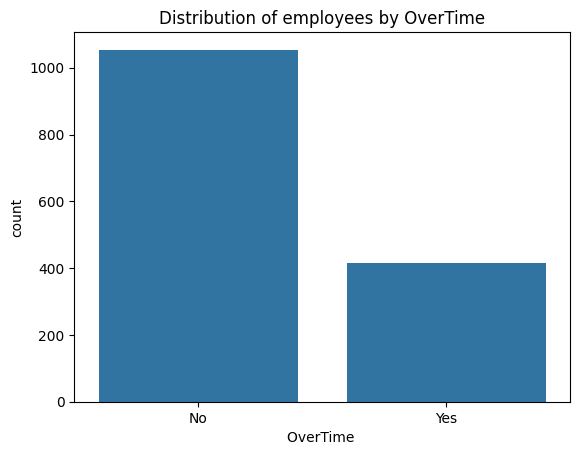

In [235]:
# Distribution of Employees by Overtime

sns.countplot(x=df['OverTime'])
plt.title('Distribution of employees by OverTime')
plt.xlabel("OverTime ")
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])

plt.show()

**Insights**
- The chart shows that a majority of employees do not work overtime compared to those who do. 
- This suggests that the organization maintains a relatively balanced workload for most staff, but the smaller group working overtime may be at higher risk for burnout or attrition and could benefit from closer monitoring or support.

##### Bivariate Analysis : Attrition of Employees by Overtime


OverTime vs Attrition (%): 

             No (0)    Yes (1)
OverTime                      
0         89.563567  10.436433
1         69.471154  30.528846


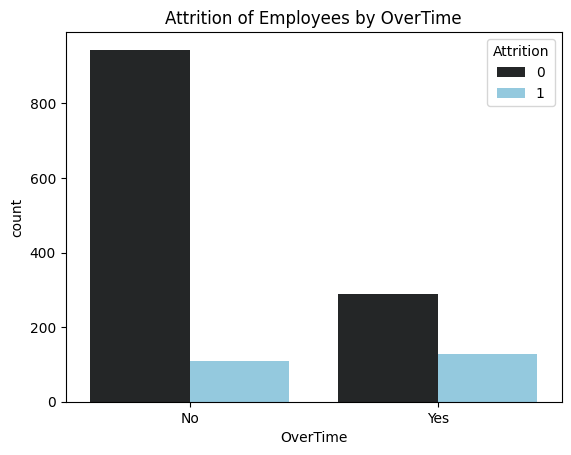

In [236]:
Column_Attr('OverTime')

sns.countplot(data=df, x='OverTime', hue='Attrition', color = 'skyblue')
plt.title('Attrition of Employees by OverTime')
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

**Insights**
- This chart reveals a striking pattern: employees who work overtime are far more likely to leave the company than those who don’t. 
- While non-overtime workers show strong retention, the attrition rate among overtime workers is nearly equal to their retention rate. 
- **This suggests that overtime may be a key driver of `attrition` and should be carefully managed to sustain employee well-being and loyalty.**

#### Department

##### Univariate Analysis : Distribution of Employees by Departments


Department Counts: 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


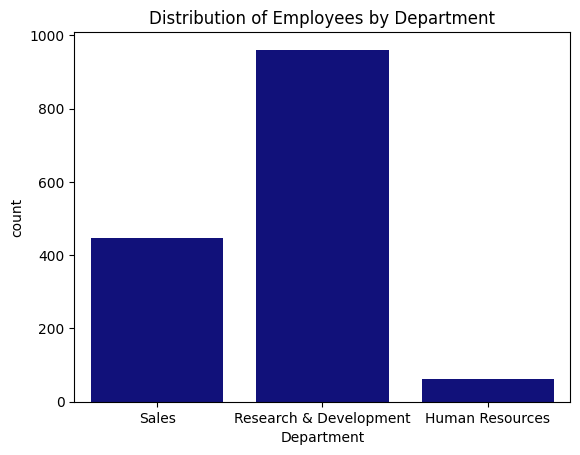

In [237]:
# Distribution of Employees by Departments

print("\nDepartment Counts: \n")
print(df['Department'].value_counts())

sns.countplot(data=df, x='Department', color='Darkblue')
plt.title('Distribution of Employees by Department')
plt.show()


**Insights**
- The chart shows that the Research & Development department dominates the workforce, accounting for nearly half of all employees. 
- Sales follows with a moderate share, while Human Resources has a minimal presence. 
- **This distribution suggests a company heavily focused on innovation and product development, with lean support and administrative staffing.**


##### Bivariate Analysis : Attrition of Employees by Department


Department vs Attrition (%): 

                           No (0)    Yes (1)
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


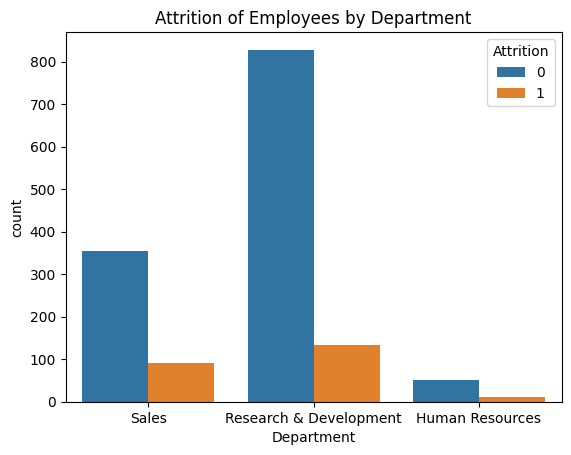

In [238]:
Column_Attr('Department')

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition of Employees by Department')
plt.show()


**Insights**
- The chart highlights a clear trend: the Sales department experiences the highest attrition relative to its size, while Research & Development, despite having the largest workforce, maintains stronger retention. 
- Human Resources shows modest attrition but has a small employee base. This suggests that Sales may benefit most from targeted retention efforts and deeper analysis into turnover drivers

#### Education

In [239]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Education level

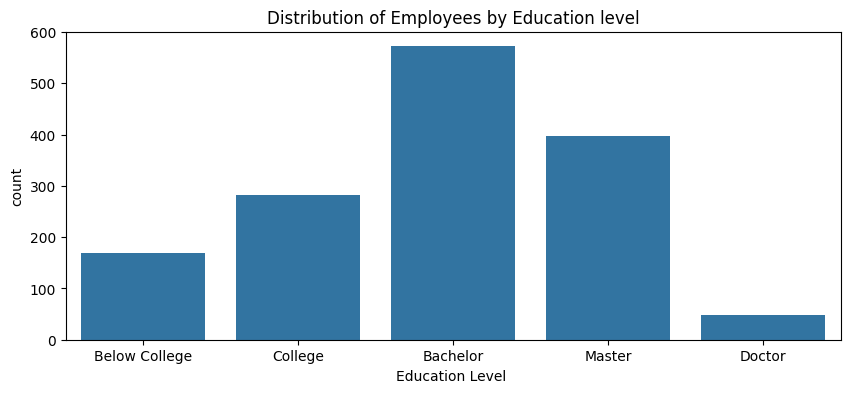

In [240]:
# Distribution of Employees by Education level

Edu_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

plt.figure(figsize = (10, 4))
sns.countplot(x=df['Education'])
plt.title('Distribution of Employees by Education level')
plt.xlabel("Education Level ")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)

plt.show()

**Insights**
- The chart shows that most employees hold a Bachelor's degree, followed by Master's and College-level education. 
- Very few have Doctorates or less than college education. 
- **This suggests the organization values formal education, with a strong emphasis on undergraduate and postgraduate qualifications—potentially shaping its hiring and training strategies around academically prepared talent.**

##### Bivariate Analysis : Attrition of Employees by Education level

In [241]:
# Create a table for an overview

pd.crosstab(df['Education'], df['Attrition'])

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5



Education vs Attrition (%): 

              No (0)    Yes (1)
Education                      
1          81.764706  18.235294
2          84.397163  15.602837
3          82.692308  17.307692
4          85.427136  14.572864
5          89.583333  10.416667


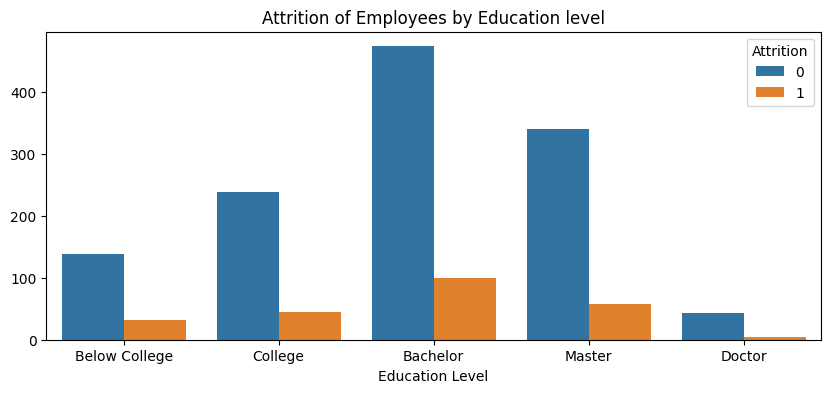

In [242]:
# Attrition of Employees by Education level

Column_Attr('Education')

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Attrition of Employees by Education level")
plt.xlabel("Education Level")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)
plt.ylabel("")
plt.show()



**Insights**
- The chart reveals that employees with `Bachelor's` and `Master's degrees` experience the highest attrition, likely due to their larger representation in the workforce. 
- Interestingly, attrition is relatively low among those with `Doctorates` and `Below College education`, possibly reflecting either stronger job fit or fewer opportunities elsewhere. 
- **This suggests that retention strategies may need to be tailored more aggressively for mid-level education groups.**

#### Job Involvement

In [243]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Job Involvement

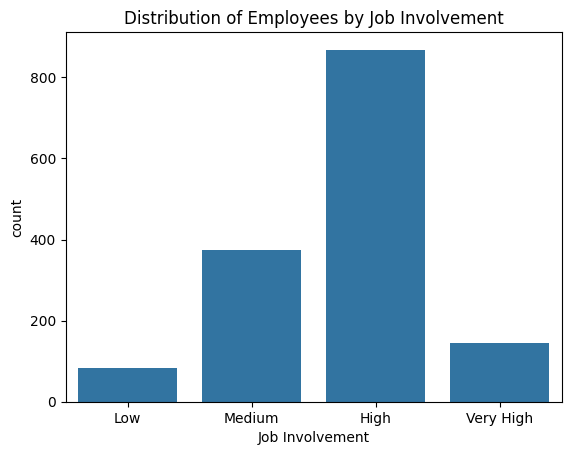

In [244]:
# Distribution of Employees by Job Involvement

rank_labels = ['Low','Medium','High','Very High']
sns.countplot(data = df, x = 'JobInvolvement')

plt.title('Distribution of Employees by Job Involvement')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

**Insights**
- The chart shows that most employees fall into the `"High"` job involvement category, suggesting strong engagement across the organization. 
- However, the low counts in both `"Low"` and `"Very High"` categories may indicate that extreme ends of involvement—either disengagement or overcommitment—are rare. 
- **This balanced distribution could reflect a healthy work culture with room to optimize motivation strategies**

##### Bivariate Analysis : Attrition of Employees by Job Involvement


JobInvolvement vs Attrition (%): 

                   No (0)    Yes (1)
JobInvolvement                      
1               66.265060  33.734940
2               81.066667  18.933333
3               85.599078  14.400922
4               90.972222   9.027778


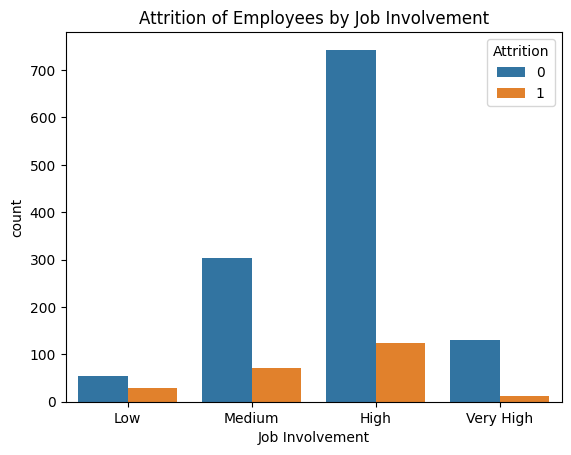

In [245]:
# Attrition of Employees by Job Involvement

Column_Attr('JobInvolvement')

sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition of Employees by Job Involvement')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

**Insights**
- The chart shows a clear pattern: employees with `"High"` job involvement are the most likely to `stay`, while those with `"Medium"` involvement show a noticeable `attrition rate`. 
- Interestingly, even among the few with `"Very High"` involvement, some still leave—suggesting that over-engagement may not guarantee retention. 
- **This insight points to the importance of fostering balanced engagement rather than extremes.**

#### Job Satisfaction

In [246]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Job Satisfaction

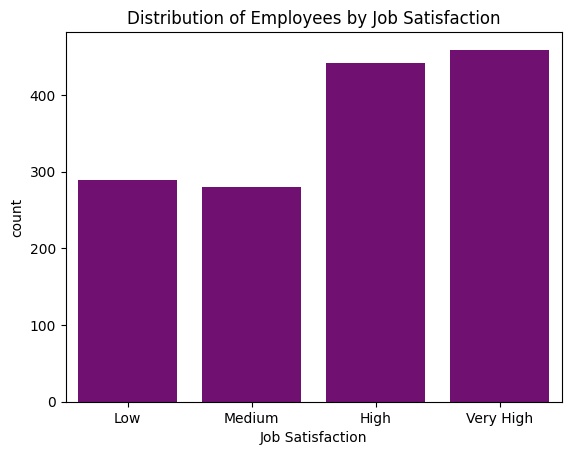

In [247]:
# Distribution of Employees by Job Satisfaction

rank_labels = ['Low','Medium','High','Very High']
sns.countplot(data = df, x = 'JobSatisfaction', color='purple')

plt.title('Distribution of Employees by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

##### Bivariate Analysis : Attrition of Employees by Job Satisfaction


JobSatisfaction vs Attrition (%): 

                    No (0)    Yes (1)
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


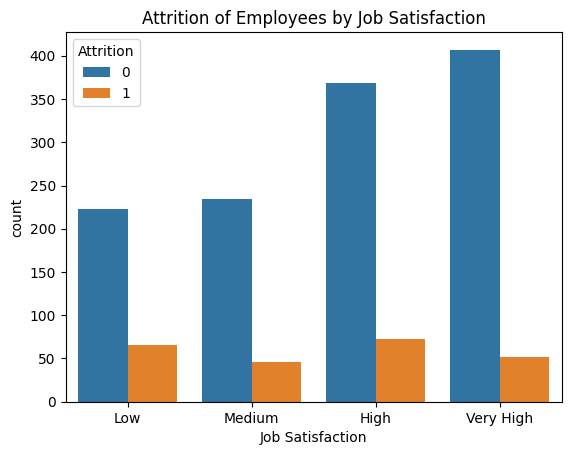

In [248]:
# Attrition of Employees by Job Satisfaction

Column_Attr('JobSatisfaction')

sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition')

plt.title('Attrition of Employees by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

#### Gender

In [249]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Gender

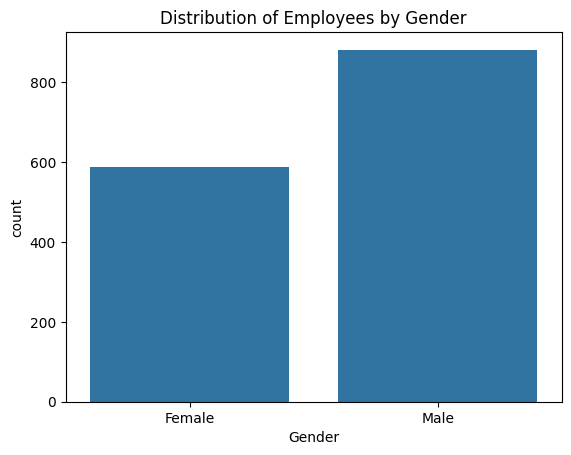

In [250]:
# Distribution of Employees by Gender

sns.countplot(data = df, x = 'Gender')

plt.title('Distribution of Employees by Gender')
plt.show()

**Insights**
- The chart shows that male employees outnumber female employees by a significant margin—`about 50% more`. 
- **This gender imbalance may reflect broader industry trends or internal hiring practices, and it presents an opportunity for the organization to strengthen diversity and inclusion efforts**

##### Bivariate Analysis : Attrition of Employees by Gender


Gender vs Attrition (%): 

           No (0)    Yes (1)
Gender                      
Female  85.204082  14.795918
Male    82.993197  17.006803


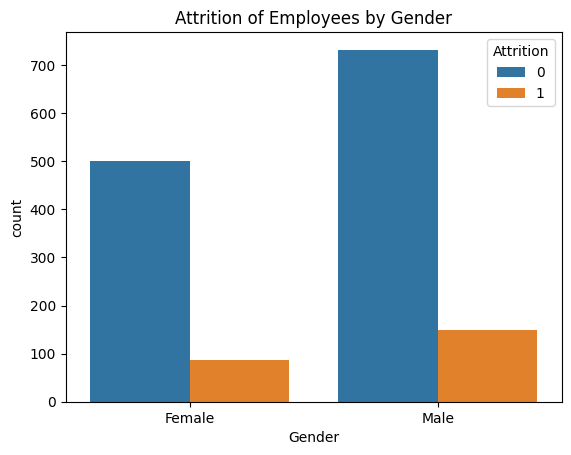

In [251]:
# Attrition of Employees by Gender

Column_Attr('Gender')

sns.countplot(data = df, x = 'Gender', hue = 'Attrition')
plt.title('Attrition of Employees by Gender')
plt.show()

**Insights**
- The chart shows that while male employees outnumber females overall, both genders experience attrition at similar proportions—`roughly 1 in 5`. 
- **This suggests that gender alone may not be a strong predictor of turnover, and retention strategies should focus more on role-specific or cultural factors rather than demographic assumptions**

#### Total Working Years

In [252]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

##### Univariate Analysis : Distribution of Employees by Total Working Years

Univariate Analysis: TotalWorkingYears 

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


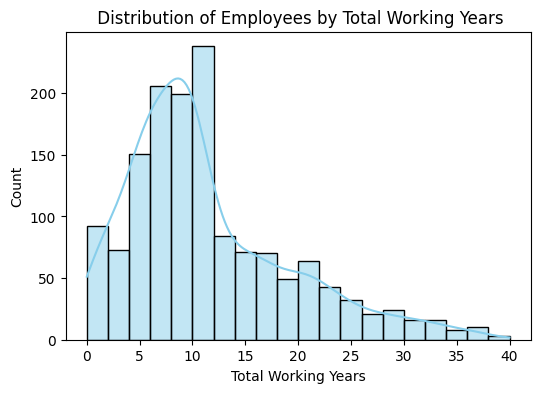

In [253]:
# Distribution of Employees by Total Working Years

print("Univariate Analysis: TotalWorkingYears \n")
print(df['TotalWorkingYears'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='skyblue')
plt.title(" Distribution of Employees by Total Working Years")
plt.xlabel("Total Working Years")
plt.show()

**Insights**
- The histogram reveals a workforce heavily concentrated in the early stages of their careers, with `most employees` having `less than 10 years of total working experience`. 
- The peak around 5 years suggests a youthful talent pool, while the sharp decline beyond 20 years indicates limited senior-level representation. 
- This insight points to opportunities for mentorship programs and long-term career development planning.

#####  Bivariate Analysis :  Attrition of Employees by Total Working Years

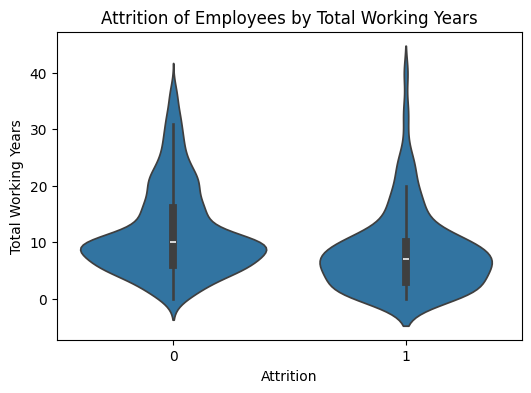

Average Total Working Years by Attrition:
Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64


In [254]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Attrition of Employees by Total Working Years")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()


print("Average Total Working Years by Attrition:")
print(df.groupby('Attrition')['TotalWorkingYears'].mean())

**Insights**
- The plot reveals a compelling trend: employees with `fewer total working years` are `more likely to leave the company`, as shown by the `wider density` in the attrition group around the lower experience range. 
- In contrast, those with longer careers tend to stay, suggesting that experience correlates with retention. 
- **This highlights the importance of supporting early-career employees to reduce turnover.**

#### Work-Life Balance

In [255]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

#####  Univariate Analysis : Distribution of Employees by Work-Life balance

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


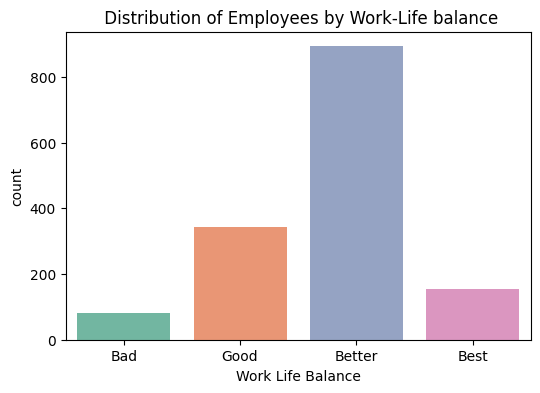

In [256]:
#  Distribution of Employees by Work-Life balance

wlb_labels = ['Bad','Good','Better','Best']
print(df['WorkLifeBalance'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title(" Distribution of Employees by Work-Life balance")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.show()


**Insights**
- The chart shows that `most employees` rate their work-life balance as `"Better"`, suggesting a generally positive perception across the organization.
- `Very few` report it as `"Bad,"` while the `"Best" category` also has relatively `low representation`. 
- **This indicates room for improvement in creating truly exceptional work-life experiences, even though the overall sentiment is favorable.**

##### Bivariate Analysis : Attrition of Employees by Work-Life balance


WorkLifeBalance vs Attrition (%): 

                    No (0)    Yes (1)
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


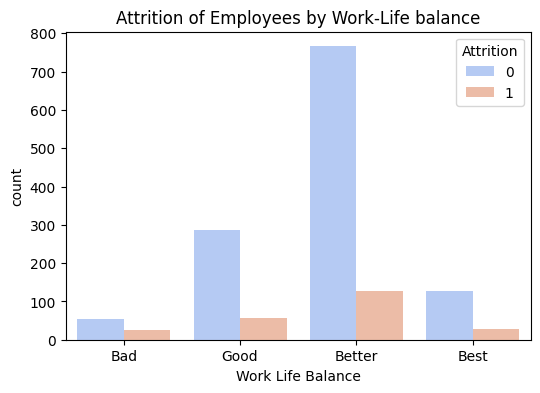

In [257]:
# Attrition of Employees by Work-Life balance

Column_Attr('WorkLifeBalance')

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='coolwarm')
plt.title("Attrition of Employees by Work-Life balance")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.show()


**Insights**
- The chart shows that employees who rate their work-life balance as `"Better"` or `"Good"` are `far more likely to stay` with the company, while attrition is relatively low across all categories. 
- **Interestingly, even those who rate it as `"Best"` still show some attrition, suggesting that while positive work-life balance helps retention, it’s not the sole factor—other elements like career growth or job satisfaction may also play a role.**

#### Numbers of Companies Worked

##### Univariate Analysis : Distribution of Employees by Numbers of Companies they've worked at

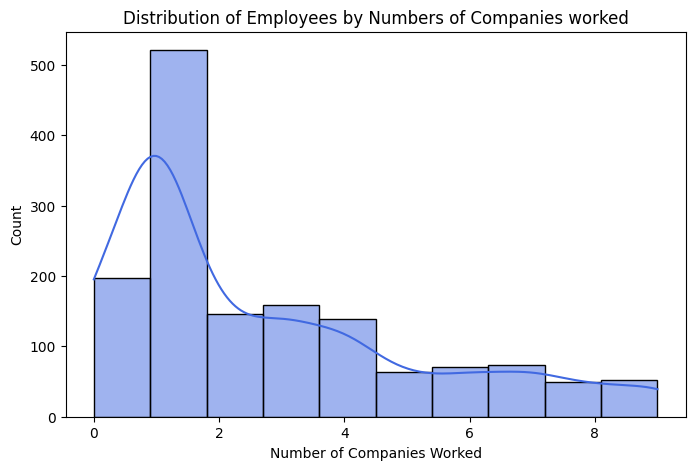

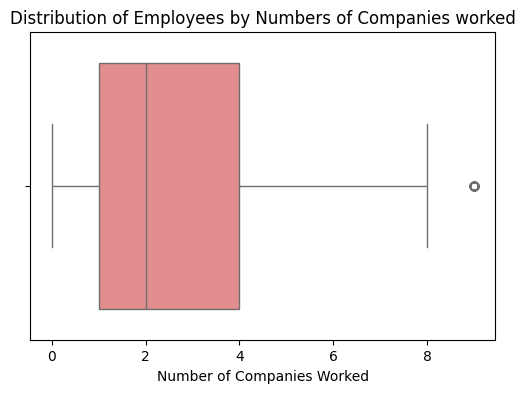

In [258]:
# Distribution of Employees by Numbers of Companies worked

plt.figure(figsize=(8,5))
sns.histplot(df['NumCompaniesWorked'], bins=10, kde=True, color='royalblue')
plt.title('Distribution of Employees by Numbers of Companies worked')
plt.xlabel('Number of Companies Worked')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['NumCompaniesWorked'], color='lightcoral')
plt.title('Distribution of Employees by Numbers of Companies worked')
plt.xlabel('Number of Companies Worked')
plt.show()

**Insights**
- The histogram shows that most employees have worked for only one company, with a steep drop-off as the number of companies increases. 
- **This right-skewed distribution suggests a workforce with relatively low job mobility, indicating strong organizational retention or a preference for long-term employment. It’s a promising sign for stability—but also a cue to explore how fresh perspectives are being infused into the company.**

##### Bivariate  : Attrition of Employees by Numbers of Companies worked


NumCompaniesWorked vs Attrition (%): 

                       No (0)    Yes (1)
NumCompaniesWorked                      
0                   88.324873  11.675127
1                   81.190019  18.809981
2                   89.041096  10.958904
3                   89.937107  10.062893
4                   87.769784  12.230216
5                   74.603175  25.396825
6                   77.142857  22.857143
7                   77.027027  22.972973
8                   87.755102  12.244898
9                   76.923077  23.076923


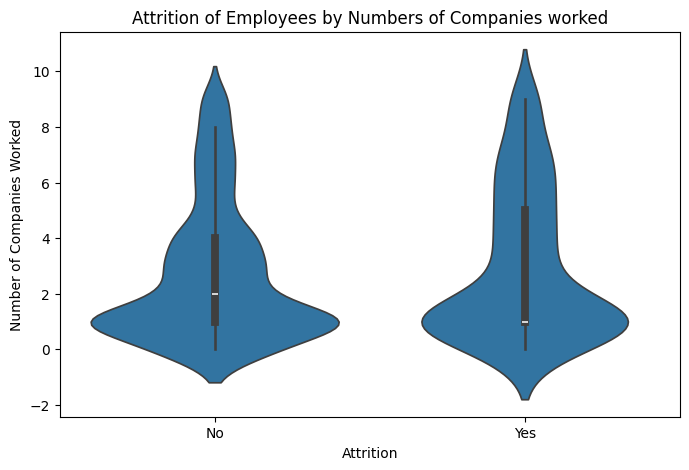

In [259]:
# Attrition of Employees by Numbers of Companies worked

Attr_label = ['No', 'Yes']

Column_Attr('NumCompaniesWorked')
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title('Attrition of Employees by Numbers of Companies worked')
plt.xlabel('Attrition')
plt.xticks(ticks=[0,1], labels = Attr_label)
plt.ylabel('Number of Companies Worked')
plt.show()

**Insights**
- This violin plot reveals an intriguing pattern: employees who have worked at more companies tend to show higher attrition. 
- The distribution for those who left skews toward higher counts of previous employers, suggesting that job-hopping behavior may correlate with a greater likelihood of leaving. 
- In contrast, those who stayed typically have fewer prior employers, indicating stronger organizational loyalty or satisfaction. 
- **This insight could be valuable for refining hiring strategies or predicting retention risks**

#### Years In Current Role

##### Univariate Analysis : Distribution of Employees by Years in current role

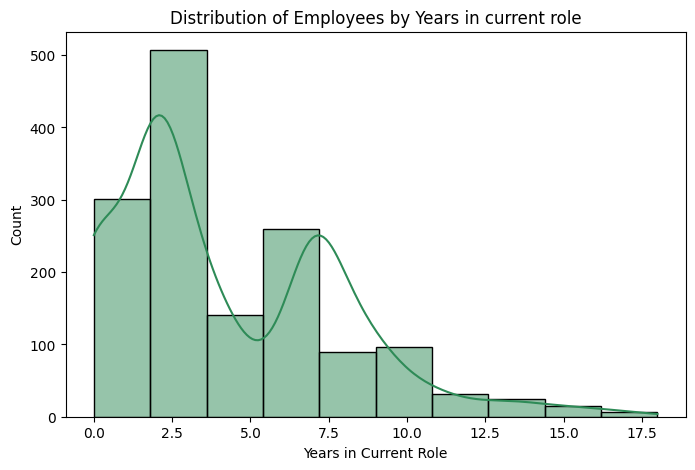

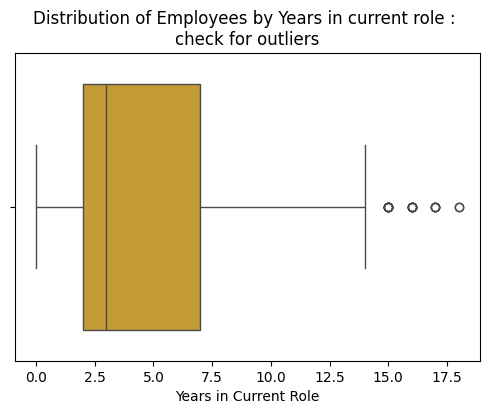

In [260]:
# Distribution of Employees by Years in current role

plt.figure(figsize=(8,5))
sns.histplot(df['YearsInCurrentRole'], bins=10, kde=True, color='seagreen')
plt.title('Distribution of Employees by Years in current role' )
plt.xlabel('Years in Current Role')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsInCurrentRole'], color='goldenrod')
plt.title('Distribution of Employees by Years in current role : \ncheck for outliers')
plt.xlabel('Years in Current Role')
plt.show()

**Insights**
- The histogram and box plot together paint a clear picture: most employees have been in their current role for just a few years, with a peak around 2 years. 
- The box plot confirms this concentration and also flags a handful of outliers—individuals who’ve held their roles for significantly longer. 
- **This suggests a workforce with relatively short tenure in current positions, possibly due to internal mobility, promotions, or turnover. Those long-tenured outliers could be key players or bottlenecks, depending on context. Definitely worth a deeper dive.**


##### Bivariate Analysis : Attrition of Employees by Years in current role

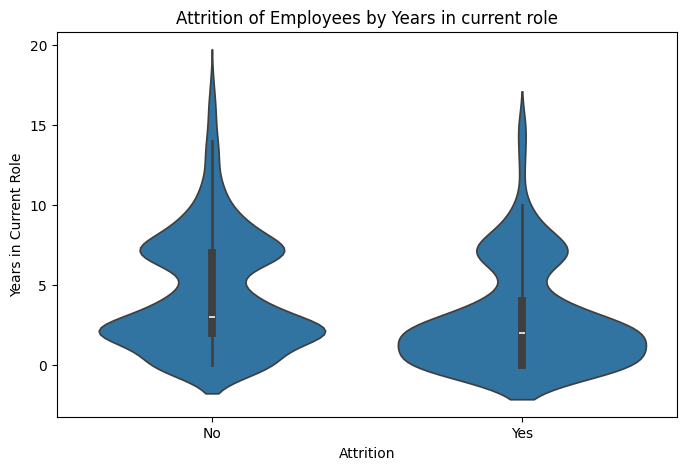

In [261]:
# Attrition of Employees by Years in current role

plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Attrition of Employees by Years in current role')
plt.xticks(ticks=[0,1], labels = Attr_label)
plt.ylabel('Years in Current Role')
plt.show()

**Insights**
- This violin plot reveals that employees who left the company tend to have slightly shorter tenures in their current roles compared to those who stayed.
-  While both groups peak around 2–3 years, the distribution for attrition cases is more spread out, suggesting that instability or dissatisfaction may emerge at various stages. 
-  **It’s a subtle but important signal that tenure alone doesn’t fully predict attrition—other factors likely play a role in whether someone stays or goes.**

#### Years Since Last Promotion

##### Univariate Analysis : Distribution of Employees by Years since last promotion

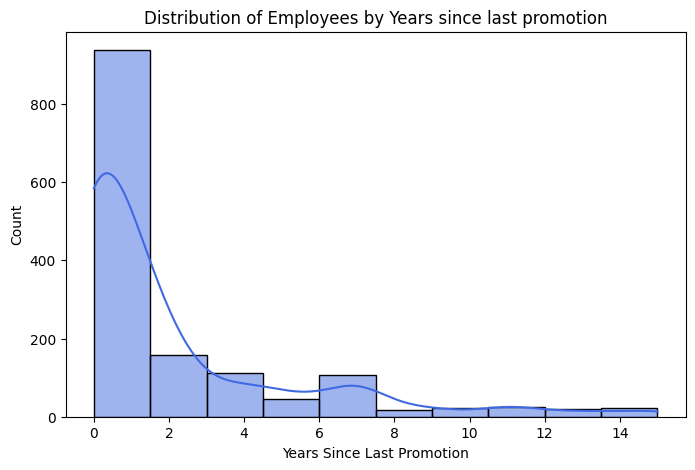

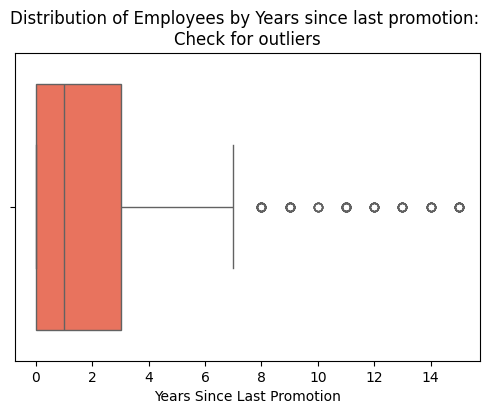

In [262]:
# Distribution of Employees by Years since last promotion

plt.figure(figsize=(8,5))
sns.histplot(df['YearsSinceLastPromotion'], bins=10, kde=True, color='RoyalBlue')
plt.title('Distribution of Employees by Years since last promotion')
plt.xlabel('Years Since Last Promotion')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsSinceLastPromotion'], color='tomato')
plt.title('Distribution of Employees by Years since last promotion: \nCheck for outliers')
plt.xlabel('Years Since Last Promotion')
plt.show()

**Insights**
- The histogram and box plot together reveal a workforce where most employees have been promoted within the last couple of years, but there’s a noticeable tail of individuals who haven’t seen advancement in a long time. 
- Those outliers—employees with extended gaps since their last promotion—could be at risk of disengagement or attrition. 
- **This pattern suggests a need for more consistent career progression planning to maintain motivation and retention across the board.**

##### Bivariate Analysis : Attrition of Employees by Years since last promotion


YearsSinceLastPromotion vs Attrition (%): 

                             No (0)    Yes (1)
YearsSinceLastPromotion                       
0                         81.067126  18.932874
1                         86.274510  13.725490
2                         83.018868  16.981132
3                         82.692308  17.307692
4                         91.803279   8.196721
5                         95.555556   4.444444
6                         81.250000  18.750000
7                         78.947368  21.052632
8                        100.000000   0.000000
9                         76.470588  23.529412
10                        83.333333  16.666667
11                        91.666667   8.333333
12                       100.000000   0.000000
13                        80.000000  20.000000
14                        88.888889  11.111111
15                        76.923077  23.076923


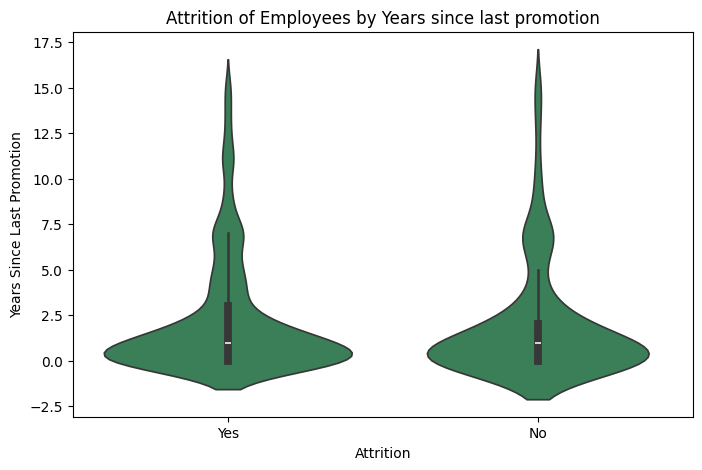

In [263]:
# Attrition of Employees by Years since last promotion

Column_Attr('YearsSinceLastPromotion')

plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=df, color = 'seagreen')
plt.title('Attrition of Employees by Years since last promotion')
plt.xticks(ticks=[1,0], labels = Attr_label)
plt.ylabel('Years Since Last Promotion')
plt.show()

**Insights**
- This violin plot shows a subtle but telling pattern: employees who haven’t been promoted in a long time are slightly more likely to leave. 
- While both groups—those who stayed and those who left—have a concentration around recent promotions, the attrition group has a longer tail, indicating more cases of extended stagnation. 
- **It suggests that timely career advancement may play a role in retention, and overlooking it could quietly fuel turnover.**

### Multivariate Analysis

In [264]:
# Function to tabulate the value counts of specified columns 

def VC_table(cols):
    table = df[cols].nunique().reset_index()
    table.columns = ['Column','Value Counts']
    
    print('Value Counts for each column of the combination')
    return table

1. Attrition By Job Satisfaction and Job Level

In [265]:
VC_table(['JobSatisfaction','JobLevel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobSatisfaction,4
1,JobLevel,5
2,Attrition,2


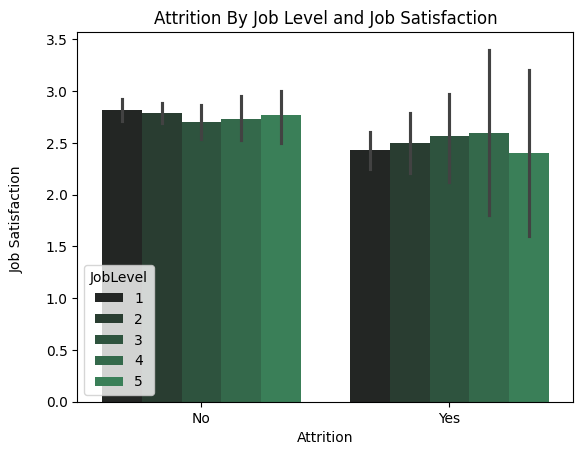

In [266]:
sns.barplot(y='JobSatisfaction', x='Attrition', hue='JobLevel', data=df, color = 'seagreen')

plt.title('Attrition By Job Level and Job Satisfaction')
plt.ylabel('Job Satisfaction \n')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.show()

**Insights**
- This chart offers a nuanced view of how job satisfaction and job level interact with attrition. Across all job levels, employees who stayed ("No" attrition) consistently report higher job satisfaction than those who left. Interestingly, lower job levels (especially Level 1 and 2) show the most pronounced drop in satisfaction among those who left, suggesting that dissatisfaction at entry or mid-level roles may be a key driver of turnover.
  
- Higher job levels (Levels 4 and 5) maintain relatively stable satisfaction regardless of attrition status, which could imply that senior roles offer more intrinsic or extrinsic rewards that buffer against dissatisfaction. This insight could help target retention strategies—especially by improving support, recognition, and growth opportunities for lower-level employees.


2. Attrition By Overtime and Job Satisfaction

In [267]:
VC_table(['OverTime','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,OverTime,2
1,JobSatisfaction,4
2,Attrition,2


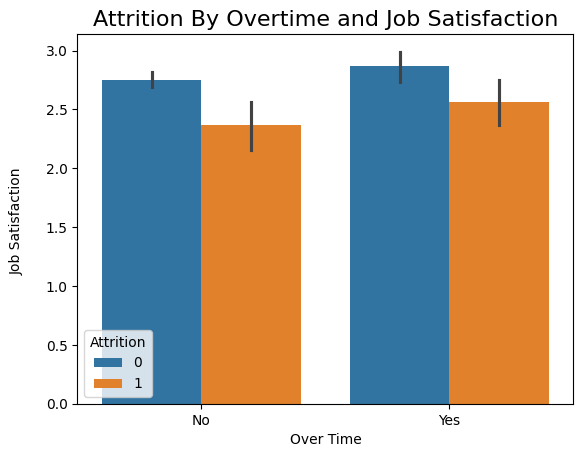

In [268]:
sns.barplot(data = df, x = 'OverTime', y ='JobSatisfaction', hue = 'Attrition')

plt.title('Attrition By Overtime and Job Satisfaction', fontsize = 16)
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Over Time')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()


**Insights**
- This chart makes the relationship between overtime and job satisfaction crystal clear: employees who don’t work overtime and haven’t left the company report the highest satisfaction. On the flip side, those who work overtime and eventually leave show the lowest satisfaction levels. It’s a strong signal that excessive overtime may erode morale and drive attrition. 
- If the goal is to boost retention, rethinking workload and time demands could be a powerful lever.


3. Attrition By Work-Life Balance and Job Satisfaction

In [269]:
VC_table(['WorkLifeBalance','JobSatisfaction','MaritalStatus','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,WorkLifeBalance,4
1,JobSatisfaction,4
2,MaritalStatus,3
3,Attrition,2


In [270]:
df[['WorkLifeBalance','JobSatisfaction', 'MaritalStatus', 'Attrition']].head(3)

,WorkLifeBalance,JobSatisfaction,MaritalStatus,Attrition
0,1,4,Single,1
1,3,2,Married,0
2,3,3,Single,1


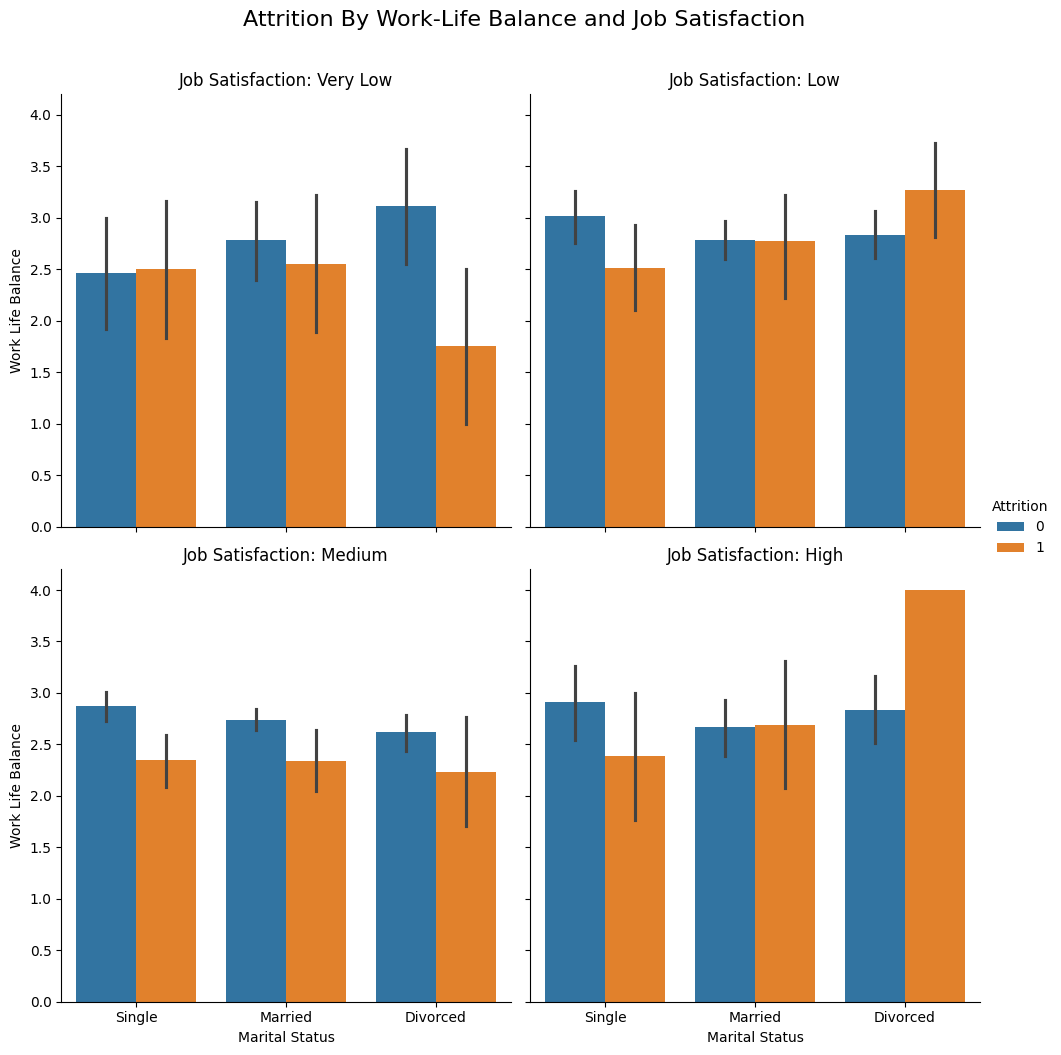

In [271]:
g = sns.catplot(data = df,kind = 'bar' , y = 'JobSatisfaction', col = 'WorkLifeBalance', x = 'MaritalStatus', hue ='Attrition', col_wrap=2)

satisfaction_labels = {
    1: "Very Low",
    2: "Low",
    3: "Medium",
    4: "High"
}

for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Job Satisfaction: {satisfaction_labels.get(title, title)}")

g.set_xlabels('Marital Status')
g.set_ylabels('Work Life Balance')
g.fig.suptitle("Attrition By Work-Life Balance and Job Satisfaction", fontsize=16, y=1.05)
plt.show()


**Insights**
- This chart is rich with insight. It shows that employees with low or very low job satisfaction—especially those who are single—tend to report poorer work-life balance and higher attrition. 
- In contrast, married employees with high job satisfaction generally report better work-life balance and lower attrition. 
- The interplay between marital status, satisfaction, and balance suggests that personal circumstances may amplify how workplace conditions are experienced. It’s a reminder that retention strategies should be both empathetic and personalized.

4. Attrition By Years In current Role and Years Since Last promotion

In [272]:
VC_table(['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,YearsInCurrentRole,19
1,YearsSinceLastPromotion,16
2,YearsWithCurrManager,18
3,Attrition,2


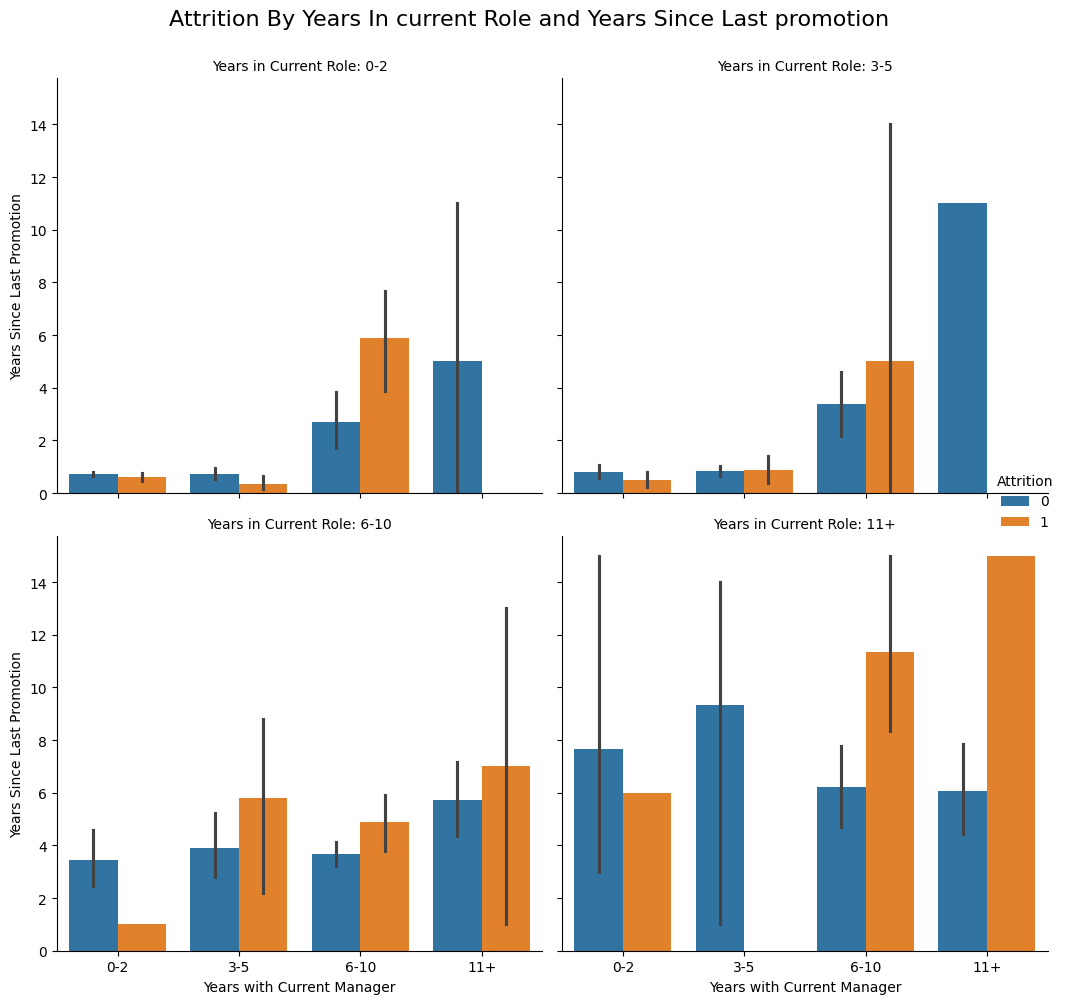

In [273]:
year_cols = df[['YearsInCurrentRole', 'YearsWithCurrManager']].columns.tolist()

test = {}

bin_edges = [0, 2, 5, 10, 20] 
bin_labels = ['0-2', '3-5', '6-10', '11+']

for col in year_cols:
    test[f'{col}_bin'] = pd.cut(
        df[col],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True,
        right=True
    )
    

    
g = sns.catplot(data = test, kind = 'bar', x = 'YearsWithCurrManager_bin', y = df['YearsSinceLastPromotion'] , hue = df['Attrition'], col = 'YearsInCurrentRole_bin', col_wrap=2)

g.set_axis_labels("Years with Current Manager", "Years Since Last Promotion")

g.set_titles("Years in Current Role: {col_name}")

g.fig.suptitle('Attrition By Years In current Role and Years Since Last promotion', fontsize=16, y=1)
plt.tight_layout()
plt.show()

**Insights**
- This chart is important for understanding promotion dynamics and attrition risk. Across all tenure groups, employees who’ve spent more time with their current manager but haven’t been promoted recently, especially those in the 6–10 and 11+ year role categories—show higher attrition. Attrition tend to be larger in these cases, signaling that stagnation under the same leadership may contribute to turnover.
- Conversely, employees with shorter time in role and more recent promotions show lower attrition, suggesting that timely advancement and fresh managerial relationships help retain talent. It’s a strong case for proactive career development and leadership rotation strategies.


5. Attrition by Education and Average Monthly Income

In [274]:
test = pd.pivot_table(df, index = 'Education', columns= 'Attrition', values = 'MonthlyIncome', aggfunc='mean')
test.columns = ['No', 'Yes']
test

,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


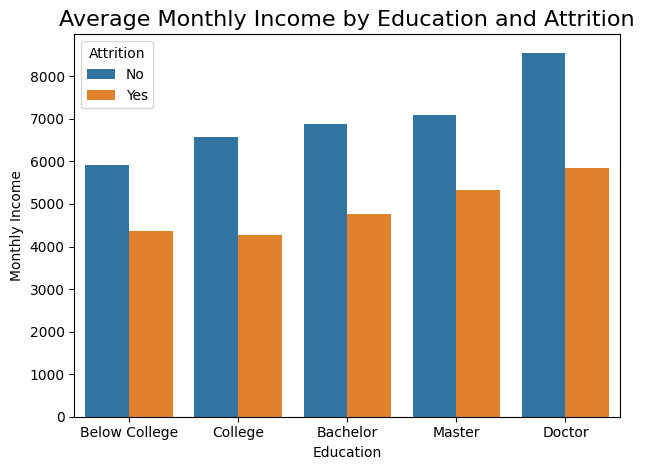

In [275]:
test_melted = test.reset_index().melt(id_vars='Education', value_name='MonthlyIncome', var_name='Attrition')

sns.barplot(data=test_melted, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education and Attrition', fontsize=16)

plt.xticks(ticks=[0,1,2,3,4], labels = Edu_labels)
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()



**Insights**
- This chart makes a strong case for the link between education, income, and retention. Across all education levels, employees who stayed consistently earn more than those who left, suggesting that higher pay may contribute to loyalty. 
- The income trend also rises with education, peaking at the doctoral level, which reinforces the value of advanced qualifications in securing better compensation and possibly greater job stability. It’s a reminder that investing in employee development can pay off in both performance and retention.

6. Attrition By Performance Rating and Job Involvement

In [276]:
VC_table(['PerformanceRating','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,PerformanceRating,2
1,JobInvolvement,4
2,Attrition,2


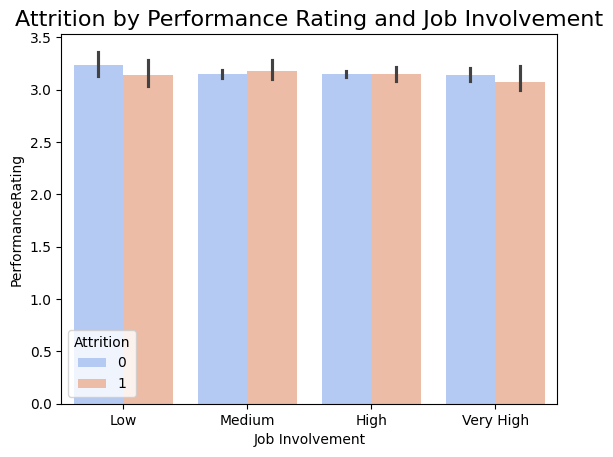

In [277]:
sns.barplot(data = df, x = 'JobInvolvement', hue = 'Attrition', y = 'PerformanceRating', palette='coolwarm')

plt.title('Attrition by Performance Rating and Job Involvement',fontsize=16)
plt.xlabel('Job Involvement')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.show()

**Insights**
- This chart reveals a subtle but meaningful pattern: employees with higher job involvement tend to have slightly better performance ratings, and those who stay consistently outperform those who leave. 
- Interestingly, the "Very High" involvement group shows a dip in performance among those who left, suggesting that even highly engaged employees may burn out or become disillusioned if their efforts aren’t matched by recognition or growth.
- It’s a reminder that involvement alone isn’t enough—organizations need to nurture and reward that engagement to truly retain top performers. Want to dig into how this might vary by department or role type?


7. Attrition by Job Satisfaction and Job Involvement

In [278]:
VC_table(['JobInvolvement','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobInvolvement,4
1,JobSatisfaction,4
2,Attrition,2


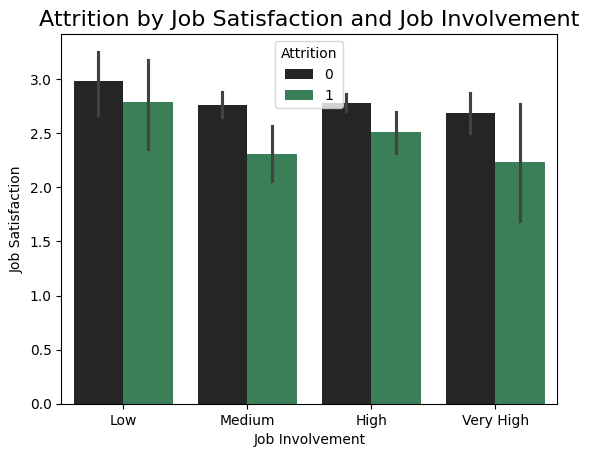

In [279]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'JobSatisfaction', hue = 'Attrition', color='seagreen')

plt.title('Attrition by Job Satisfaction and Job Involvement', fontsize=16)
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.xlabel('Job Involvement')
plt.ylabel('Job Satisfaction')
plt.show()

**Insights**
- Employees with higher involvement levels—especially "High" and "Very High"—tend to report greater job satisfaction, and those who stay consistently show higher satisfaction across all involvement levels.
However, the "Very High" involvement group with attrition shows a noticeable drop in satisfaction, hinting that even deeply engaged employees may leave if their expectations aren’t met. 
- It’s a reminder that involvement without fulfillment can lead to burnout or disillusionment. Balancing engagement with recognition and growth opportunities is key to keeping top talent energized and committed.


8. Attrition By Numbers of companies worked and Total Working Years

In [280]:
VC_table(['NumCompaniesWorked','TotalWorkingYears','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,NumCompaniesWorked,10
1,TotalWorkingYears,40
2,Attrition,2


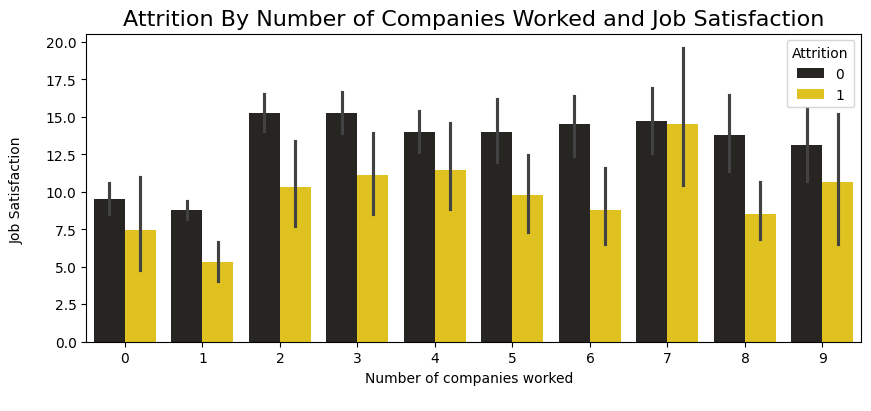

In [281]:
plt.figure(figsize = (10, 4))
sns.barplot(y='TotalWorkingYears', x='NumCompaniesWorked', hue='Attrition', data=df, color='gold')

plt.title('Attrition By Number of Companies Worked and Job Satisfaction', fontsize=16)
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Number of companies worked  \n')

plt.show()

**Insights**
- employees who’ve worked at fewer companies tend to report higher job satisfaction, especially among those who stayed. As the number of companies worked increases, satisfaction generally declines—particularly for those who left. 
- This suggests that frequent job changes may be linked to lower satisfaction and higher attrition, possibly due to unmet expectations or lack of long-term engagement.
- It’s a strong case for investing in onboarding, career development, and culture-building to turn new hires into long-term contributors.


9. Attrition by Environment Satisfaction and job Involvement 

In [282]:
VC_table(['EnvironmentSatisfaction','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,EnvironmentSatisfaction,4
1,JobInvolvement,4
2,Attrition,2


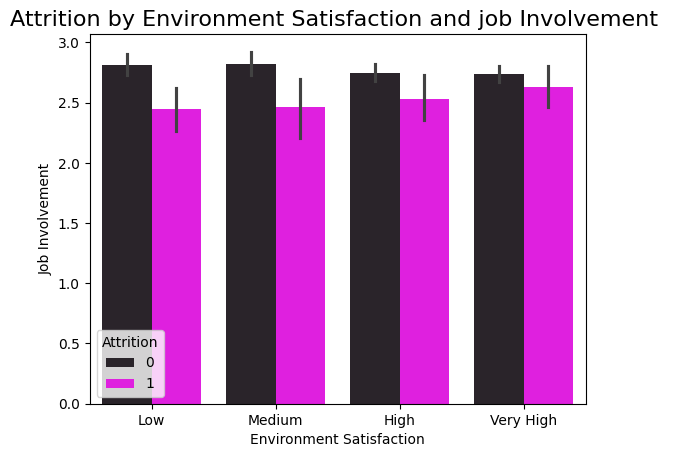

In [283]:
sns.barplot(data = df, x = 'EnvironmentSatisfaction', y = 'JobInvolvement', hue = 'Attrition', color='magenta')

plt.title('Attrition by Environment Satisfaction and job Involvement ', fontsize=16)
plt.xlabel('Environment Satisfaction')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.ylabel('Job Involvement')

plt.show()

**Insights**
- Employees who are more satisfied with their work environment tend to show higher job involvement—especially those who stayed. Across all satisfaction levels, those who stayed consistently surpass those who left , suggesting that a supportive environment not only boosts engagement but also helps retain talent.
- It’s a compelling case for investing in workplace culture and conditions. Even small improvements in the environment could ripple out into stronger involvement and lower turnover.


10. Attrition by Business Travel and Marital Status

In [284]:
VC_table(['MaritalStatus','BusinessTravel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,MaritalStatus,3
1,BusinessTravel,3
2,Attrition,2


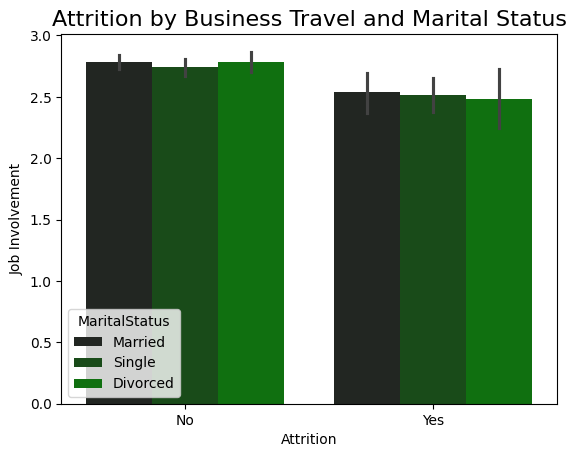

In [285]:
sns.barplot(data = df, x = 'Attrition', y = 'JobInvolvement', hue = 'MaritalStatus', color='green')

plt.title('Attrition by Business Travel and Marital Status', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.ylabel('Job Involvement')
plt.show()

**Insights**
- This chart uncovers a subtle but meaningful pattern: single employees who left the company show the lowest job involvement, while married employees who stayed  report the highest. Divorced employees fall somewhere in between. 
- It suggests that marital status may influence how deeply employees engage with their work, and that lower involvement could be a warning sign for attrition, especially among singles.
- This could be a cue to tailor engagement strategies based on personal circumstances.


11. Attrition by Department and Job Satisfaction

In [286]:
VC_table(['Department', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,Department,3
1,JobSatisfaction,4
2,Attrition,2


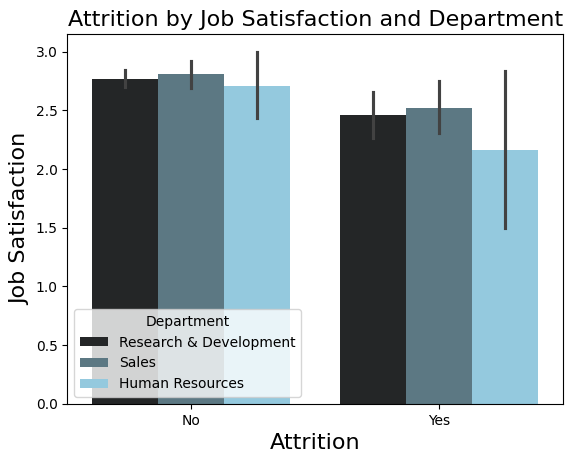

In [287]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'Department', color='skyblue')

plt.title('Attrition by Job Satisfaction and Department', fontsize=16)
plt.ylabel('Job Satisfaction', fontsize=16)
plt.xlabel('Attrition', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

**Insights**
- This chart draws a clear line between department, job satisfaction, and attrition. Employees in Research & Development and Human Resources who stayed  report the highest satisfaction, while those in Sales who left show the lowest. 
- It suggests that Sales may be a pressure point for turnover, possibly due to role demands or unmet expectations.
- The contrast across departments highlights the need for tailored retention strategies : what works for R&D might not resonate in Sales. 


12. Attrition by Training Time Last Year and Job Level

In [288]:
VC_table(['TrainingTimesLastYear', 'JobLevel', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,TrainingTimesLastYear,7
1,JobLevel,5
2,Attrition,2


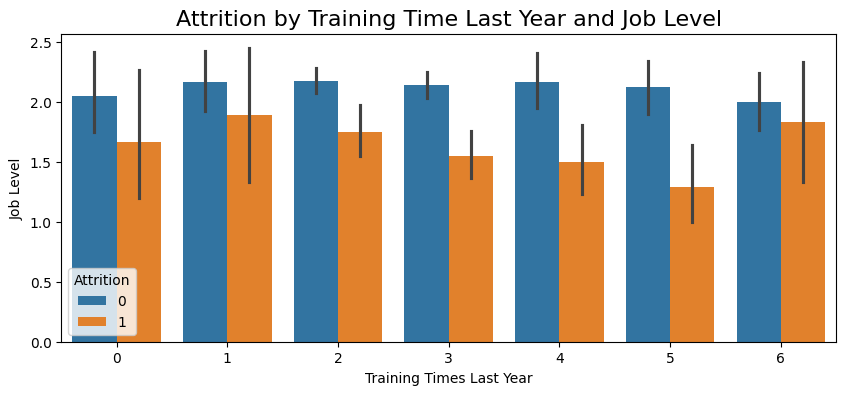

In [289]:
plt.figure(figsize = (10, 4))

sns.barplot(data = df, x = 'TrainingTimesLastYear', y = 'JobLevel', hue = 'Attrition')

plt.title('Attrition by Training Time Last Year and Job Level', fontsize = 16)
plt.xlabel('Training Times Last Year')
plt.ylabel('Job Level')
plt.show()

**Insights**
- Employees who received more training last year tend to be at slightly higher job levels—especially those who stayed. 
- Meanwhile, those who left, often show lower job levels across most training categories, suggesting that lack of advancement despite training might contribute to turnover.
- It’s a subtle signal that training alone isn’t enough—employees need to see tangible career growth tied to their development efforts.


13. Attrition by Distance From Home and Job Satisfaction

In [290]:
VC_table(['DistanceFromHome', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,DistanceFromHome,29
1,JobSatisfaction,4
2,Attrition,2


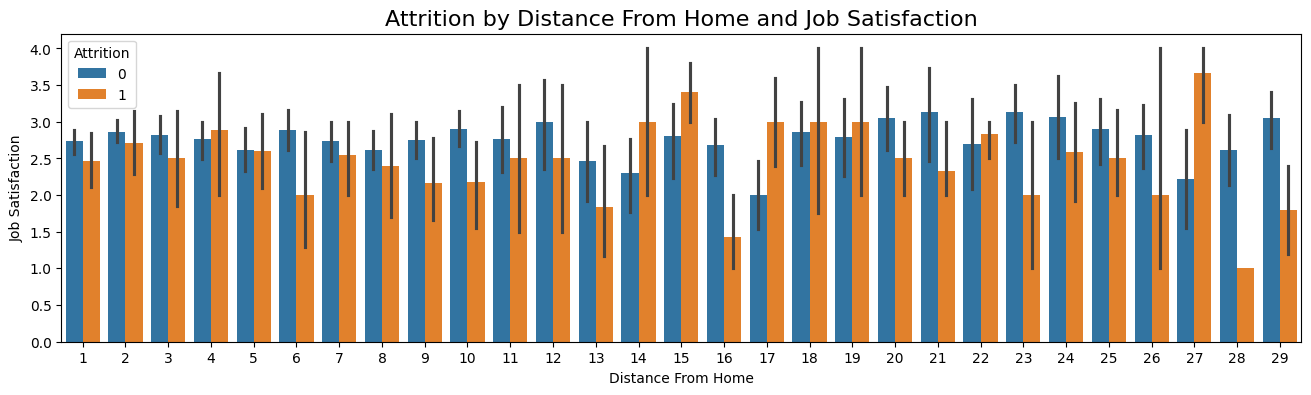

In [291]:
plt.figure(figsize = (16, 4))

sns.barplot(data = df, x = 'DistanceFromHome', y = 'JobSatisfaction', hue = 'Attrition')
plt.title('Attrition by Distance From Home and Job Satisfaction', fontsize = 16)
plt.xlabel('Distance From Home')
plt.ylabel('Job Satisfaction')
plt.show()

**Insights**
- This chart paints a clear picture: employees who live farther from work and eventually leave, tend to report lower job satisfaction than those who stay. While satisfaction fluctuates across distances, those who leave are generally lesser than those who stay, especially at longer commute ranges.
- It’s a strong signal that long commutes may quietly erode morale and increase turnover risk. 
- **If remote work or flexible scheduling is an option, it could be a powerful lever for boosting satisfaction and retention.**


14. Attrition by Relationship Satisfaction and Job Satisfaction

In [292]:
VC_table(['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,RelationshipSatisfaction,4
1,JobSatisfaction,4
2,Attrition,2


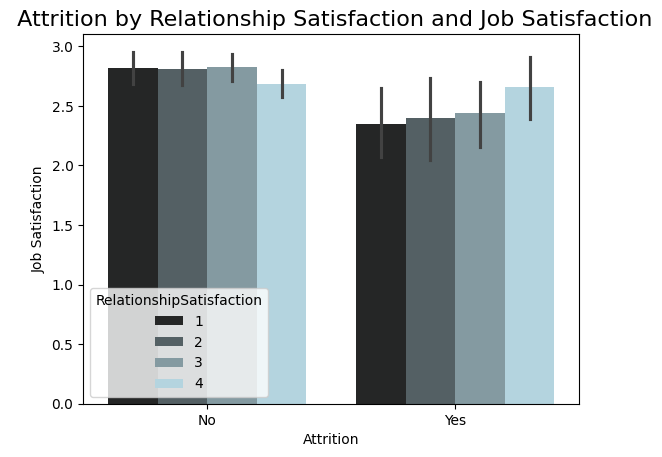

In [293]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'RelationshipSatisfaction', color='lightblue')

plt.title(' Attrition by Relationship Satisfaction and Job Satisfaction', fontsize = 16)
plt.ylabel('Job Satisfaction')
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

**Insights**
- Employees who stayed, consistently report higher job satisfaction across all levels of relationship satisfaction. But the gap widens as relationship satisfaction increases: those with high relationship satisfaction who still left, show a noticeable drop in job satisfaction, suggesting that even strong personal relationships can’t always offset workplace dissatisfaction.
- It’s a reminder that retention isn’t just about personal stability; it’s about creating a work environment that matches employees’ expectations and values.


### Feature Engineering

#### Feature Addition

In [294]:
df.shape

(1470, 31)

In [295]:
# Add Loyalty Feature 

df['Loyalty'] = round((df['YearsAtCompany'] / df['TotalWorkingYears']), 2)

df['Loyalty'].fillna(0, inplace=True)

df['Loyalty'].isnull().sum()

np.int64(0)

In [296]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Loyalty
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.75
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.00


In [297]:
print(df.shape)

(1470, 32)


#### Feature Selection

##### Define and Encode x

In [298]:
# Define x

x = df.drop( columns = ['Attrition','DailyRate', 'EducationField', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Education', 'BusinessTravel','Gender','PerformanceRating','YearsAtCompany'])

x.shape

(1470, 21)

In [299]:
# Get the Numerial columns and Nominal Columns of x

x_numerical_cols = x.select_dtypes( include = 'number').columns.tolist()

x_non_ordinal_cols = x.select_dtypes(include = ['object']).columns.tolist()

print(str( len(x_non_ordinal_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_non_ordinal_cols) )

3 Categorical Columns of Independent Variable (x)  
 
['Department', 'JobRole', 'MaritalStatus']


In [300]:
# x Ordinal Columns 

x_ordinal_cols = [col for col in ordinal_cols if col in x.columns and col not in x_non_ordinal_cols]

print(f'Ordinal Columns of x : \n \n{x_ordinal_cols}')

print(f'\n Non-Ordinal / Nominal Columns of x : {x_non_ordinal_cols}')

Ordinal Columns of x : 
 
['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

 Non-Ordinal / Nominal Columns of x : ['Department', 'JobRole', 'MaritalStatus']


In [301]:
x_numerical_cols = [col for col in x_numerical_cols if col not in x_ordinal_cols]

print(x_numerical_cols)


['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Loyalty']


In [302]:
# Define and encode y (Dependent Variable)

y = df['Attrition']

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Modeling

In [303]:
# Split dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [304]:
# Preprocessing 

preprocessors = ColumnTransformer(
    
    transformers = [
        
        ('One_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), x_non_ordinal_cols),
        ('Ord_encoder', OrdinalEncoder(), x_ordinal_cols),
        ('num', 'passthrough', x_numerical_cols)
        
    ],
    
    remainder = 'drop'
)

In [305]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state=42)

In [306]:
# F1_score, PR score, Auc_score

def model_metric(pipeline, metric):
    for i in range(len(metric)):
        scores = cross_val_score(pipeline, x_train, y_train, cv = cv, scoring = metric[i], error_score='raise')
        pipeline.fit(x_train, y_train)
        
        print(f'{metric[i].upper()} : {scores.mean()} \n')
        
        print(f'{metric[i].upper()} (std) : {scores.std()} \n')
        
    print(classification_report(pipeline.predict(x_test), y_test))

    # Confusion Matrix chart
    
    ConfusionMatrixDisplay.from_predictions(y_test, pipeline.predict(x_test))
    plt.show()
    
    # ROC Curve
    
    probs = pipeline.predict_proba(x_test)
    preds = probs[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Precision-Recall Curve
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    avg_precision = average_precision_score(y_test, preds)
    plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    


In [307]:
# Feature Importance

def feature_importance_linear(pipeline):
    importance = pipeline.named_steps['lr'].coef_[0]
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df

def feature_importance_tree(pipeline):
    importance = pipeline.named_steps['model'].feature_importances_
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df


In [308]:
# grid search parameters function

def grid_search(grid):
    fit = grid.fit(x_train, y_train)
    y_pred_lr = grid.predict(x_test)
    return fit, print("Best params:", grid.best_params_), print("Best F1:", grid.best_score_), print(classification_report(y_test, y_pred_lr))
    


#### Logistic Regressor

F1_MACRO : 0.7252229629005749 

F1_MACRO (std) : 0.02610802861271747 

F1 : 0.5195466121772092 

F1 (std) : 0.046576476490234255 

PRECISION : 0.7387176724137932 

PRECISION (std) : 0.10362699349961965 

RECALL : 0.40480939716312053 

RECALL (std) : 0.04624756122775409 

ROC_AUC : 0.8304082770563255 

ROC_AUC (std) : 0.013903808316337979 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       265
           1       0.40      0.66      0.50        29

    accuracy                           0.87       294
   macro avg       0.68      0.77      0.71       294
weighted avg       0.90      0.87      0.88       294



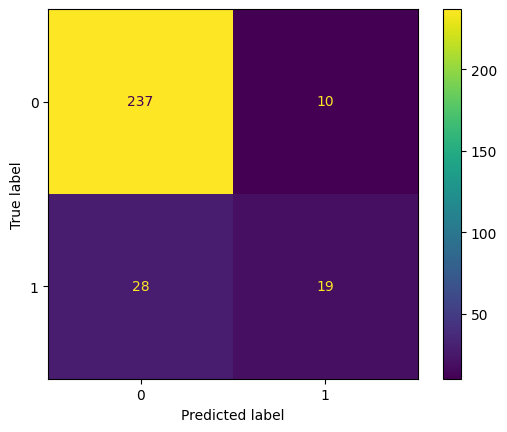

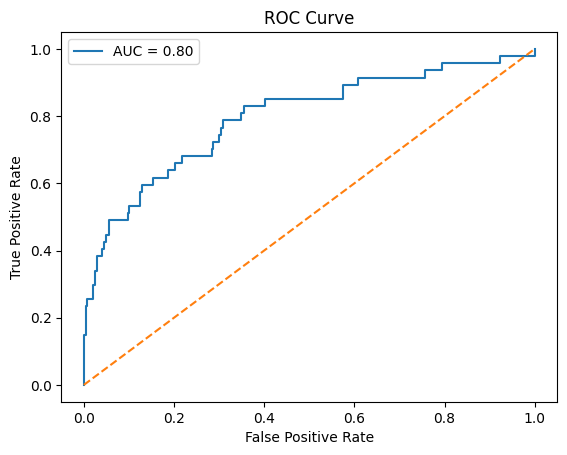

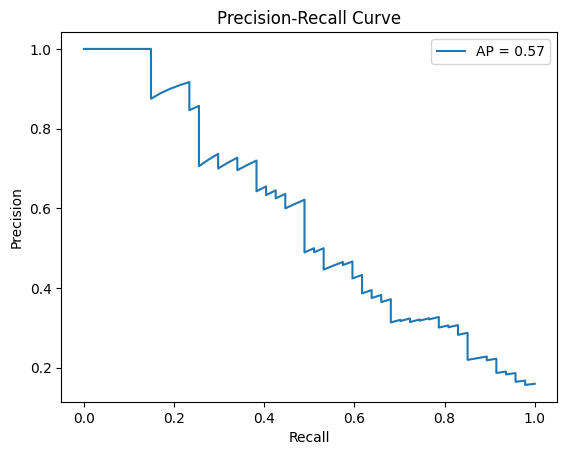

,feature,coefficient
25,OverTime,0.825533
30,YearsSinceLastPromotion,0.556481
8,JobRole_Research Director,-0.506830
24,NumCompaniesWorked,0.475748
15,EnvironmentSatisfaction,-0.452130
31,YearsWithCurrManager,-0.406450
22,Age,-0.393363
5,JobRole_Laboratory Technician,0.388894
18,JobSatisfaction,-0.380968
29,YearsInCurrentRole,-0.362930


In [309]:
# Baseline Model without SMOTE()

Pipe_lr = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    
])

model_metric(Pipe_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_lr)

F1_MACRO : 0.6642118489322704 

F1_MACRO (std) : 0.017214879103933163 

F1 : 0.4907094291879027 

F1 (std) : 0.01574328957485432 

PRECISION : 0.37449090369651117 

PRECISION (std) : 0.017259752888474252 

RECALL : 0.6993572695035462 

RECALL (std) : 0.0633154816564417 

ROC_AUC : 0.8205904837173101 

ROC_AUC (std) : 0.008764512340550519 

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       208
           1       0.62      0.34      0.44        86

    accuracy                           0.74       294
   macro avg       0.69      0.63      0.64       294
weighted avg       0.72      0.74      0.72       294



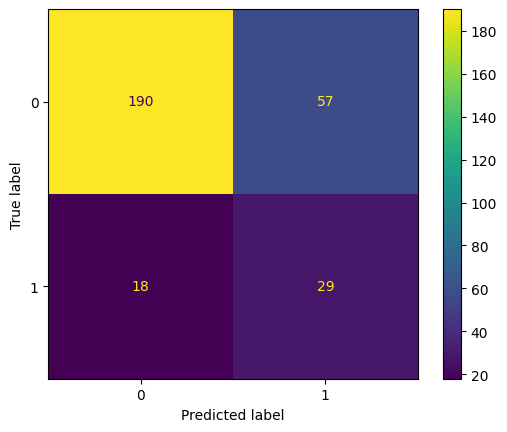

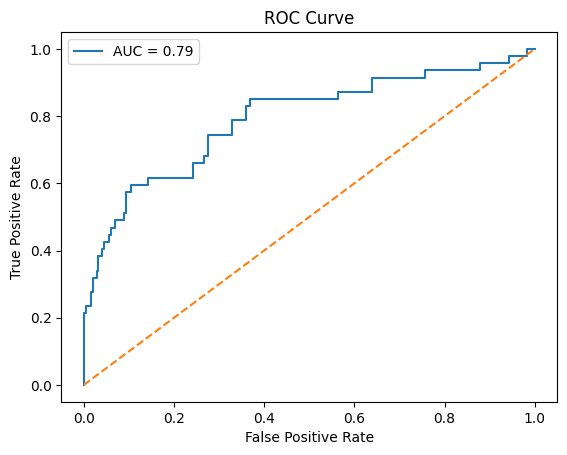

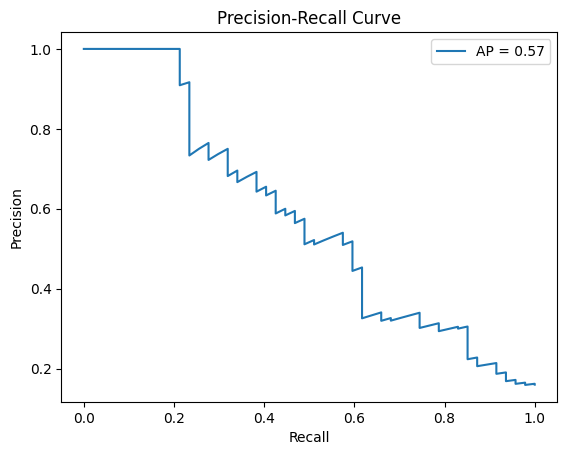

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
Best params: {'lr__C': 1, 'lr__class_weight': 'balanced', 'lr__max_iter': 600, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best F1: 0.6840109644703973
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.64      0.47        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.66       294
weighted avg       0.83      0.77      0.79       294



,feature,coefficient
25,OverTime,0.923686
8,JobRole_Research Director,-0.717385
27,TotalWorkingYears,-0.582517
5,JobRole_Laboratory Technician,0.540278
4,JobRole_Human Resources,0.530345
17,JobLevel,0.522322
15,EnvironmentSatisfaction,-0.518253
24,NumCompaniesWorked,0.517966
30,YearsSinceLastPromotion,0.492907
31,YearsWithCurrManager,-0.422997


In [310]:
Pipe_lr_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42))
    
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
    'lr__max_iter' : [100, 200, 300, 400, 500, 600],
}

scoring = {
    'f1_macro': 'f1_macro',
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_lr = GridSearchCV(
    estimator=Pipe_lr_balanced,
    param_grid=param_grid_lr,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_lr_balanced, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

lr_fit = grid_search(grid_lr)

lr_best_params = grid_lr.best_params_

lr_clean_params = {k.split('__')[1]: v for k, v in lr_best_params.items()}

feature_importance_linear(Pipe_lr_balanced)



F1_MACRO : 0.6757728286997795 

F1_MACRO (std) : 0.020037989821338947 

F1 : 0.5098179046578251 

F1 (std) : 0.03399382288136009 

PRECISION : 0.38177760850033204 

PRECISION (std) : 0.029258253365569333 

RECALL : 0.6995789007092198 

RECALL (std) : 0.050596394681484955 

ROC_AUC : 0.8195467631266136 

ROC_AUC (std) : 0.009610350202817438 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       208
           1       0.64      0.35      0.45        86

    accuracy                           0.75       294
   macro avg       0.71      0.63      0.65       294
weighted avg       0.73      0.75      0.73       294



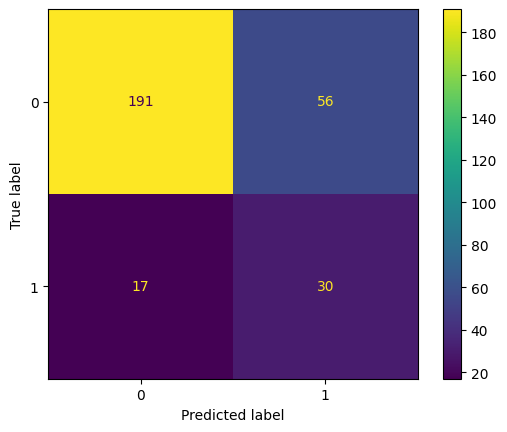

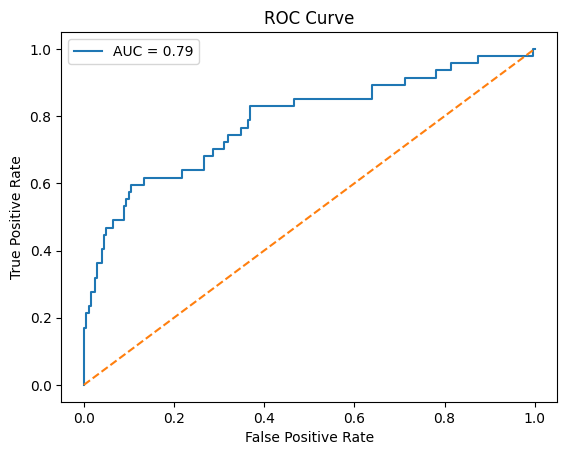

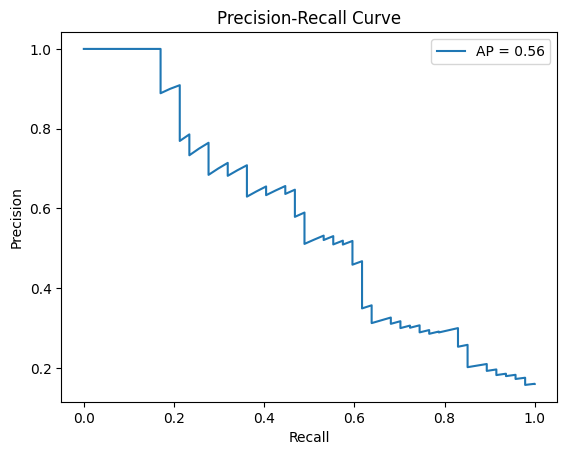

In [311]:
final_lr = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(**lr_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

#### Random Forest Classifier

F1_MACRO : 0.6339400118565763 

F1_MACRO (std) : 0.014961423610389026 

F1 : 0.34379800307219666 

F1 (std) : 0.02783028451154881 

PRECISION : 0.8038690476190476 

PRECISION (std) : 0.13988823435959474 

RECALL : 0.2208554964539007 

RECALL (std) : 0.021484227638320638 

ROC_AUC : 0.7907642349665162 

ROC_AUC (std) : 0.02196871403359471 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       285
           1       0.09      0.44      0.14         9

    accuracy                           0.84       294
   macro avg       0.53      0.65      0.53       294
weighted avg       0.95      0.84      0.89       294



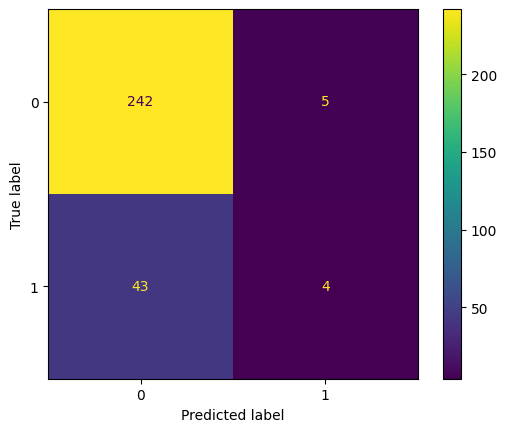

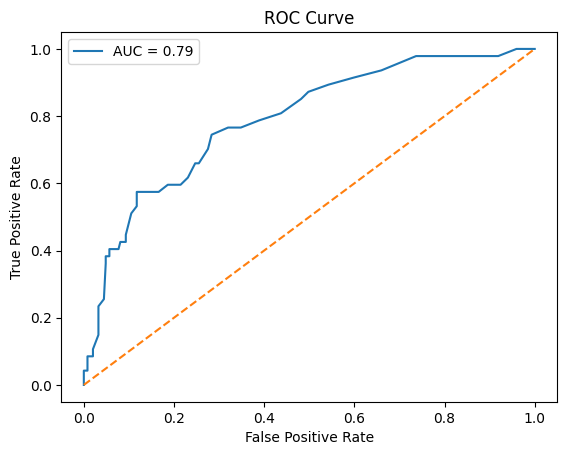

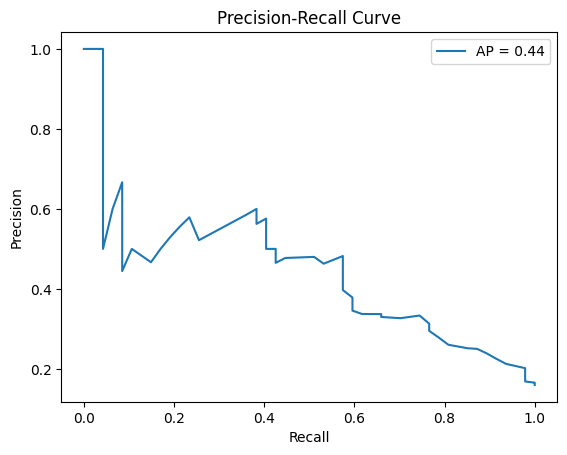

,feature,coefficient
22,Age,0.091410
27,TotalWorkingYears,0.074439
23,DistanceFromHome,0.069236
26,PercentSalaryHike,0.057788
31,YearsWithCurrManager,0.055108
25,OverTime,0.048245
32,Loyalty,0.044826
24,NumCompaniesWorked,0.044356
15,EnvironmentSatisfaction,0.044163
29,YearsInCurrentRole,0.042197


In [312]:
Pipe_rf = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('model', RandomForestClassifier(random_state=42))
    
])

model_metric(Pipe_rf, ['f1_macro', 'f1', 'precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_rf)

F1_MACRO : 0.6791097894902314 

F1_MACRO (std) : 0.04032268732495992 

F1 : 0.4616850401311018 

F1 (std) : 0.07476984050547279 

PRECISION : 0.7049465240641711 

PRECISION (std) : 0.08365726502098814 

RECALL : 0.32557624113475175 

RECALL (std) : 0.07642935337398277 

ROC_AUC : 0.7919043296776914 

ROC_AUC (std) : 0.02876105384338981 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       276
           1       0.23      0.61      0.34        18

    accuracy                           0.85       294
   macro avg       0.60      0.74      0.63       294
weighted avg       0.93      0.85      0.88       294



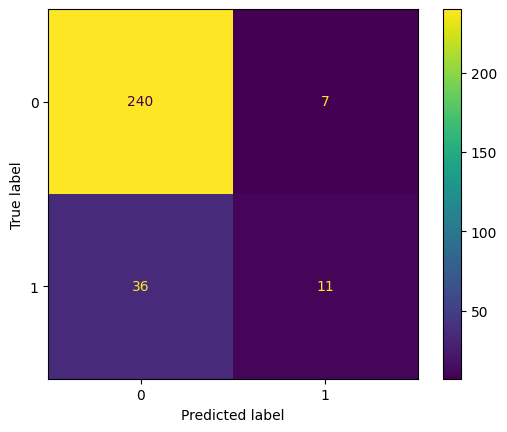

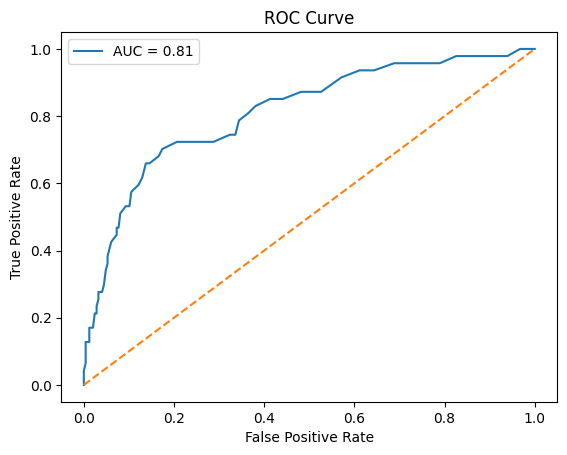

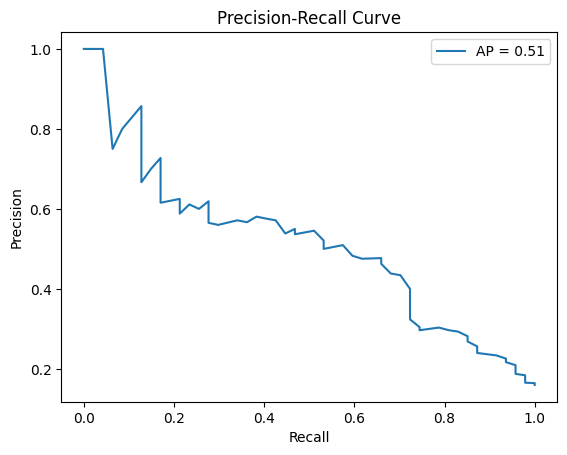

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
Best params: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 15, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best F1: 0.7105215180609818
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.58      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.72      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



,feature,coefficient
25,OverTime,0.122765
14,MaritalStatus_Single,0.063068
20,StockOptionLevel,0.058723
17,JobLevel,0.052414
22,Age,0.049688
27,TotalWorkingYears,0.044371
18,JobSatisfaction,0.041936
1,Department_Research & Development,0.040034
2,Department_Sales,0.039228
31,YearsWithCurrManager,0.037637


In [313]:
Pipe_rf_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('smote', SMOTE()),
    ('model', RandomForestClassifier(random_state=42))
    
])

param_grid_rf = {
    'model__class_weight' : [None, 'balanced', 'balanced_subsample'],
    'model__n_estimators' : [100, 200, 300],
    'model__max_depth' : [10, 15, 20],
    'model__criterion' : ['gini', 'entropy', 'log_loss'],
    'model__min_samples_split' : [2, 3, 4, 5],
    'model__min_samples_leaf' : [1, 2]
}

grid_rf = GridSearchCV(
    estimator=Pipe_rf_balanced,
    param_grid=param_grid_rf,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_rf_balanced, ['f1_macro', 'f1', 'precision', 'recall', 'roc_auc'])

rf_fit = grid_search(grid_rf)

rf_best_params = grid_rf.best_params_

rf_clean_params = {k.split('__')[1]: v for k, v in rf_best_params.items()}

feature_importance_tree(Pipe_rf_balanced)



F1_MACRO : 0.6817461014177267 

F1_MACRO (std) : 0.017205934984905812 

F1 : 0.4965817388718152 

F1 (std) : 0.03314148957400974 

PRECISION : 0.3734910825206622 

PRECISION (std) : 0.025554550341930073 

RECALL : 0.6995789007092199 

RECALL (std) : 0.045701596028773855 

ROC_AUC : 0.8222150497196247 

ROC_AUC (std) : 0.01679486737271209 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       205
           1       0.66      0.35      0.46        89

    accuracy                           0.75       294
   macro avg       0.71      0.64      0.65       294
weighted avg       0.73      0.75      0.72       294



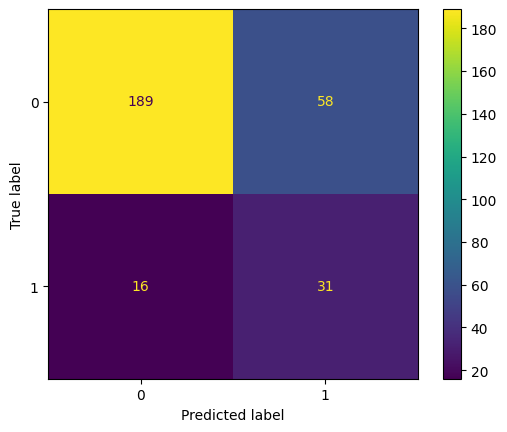

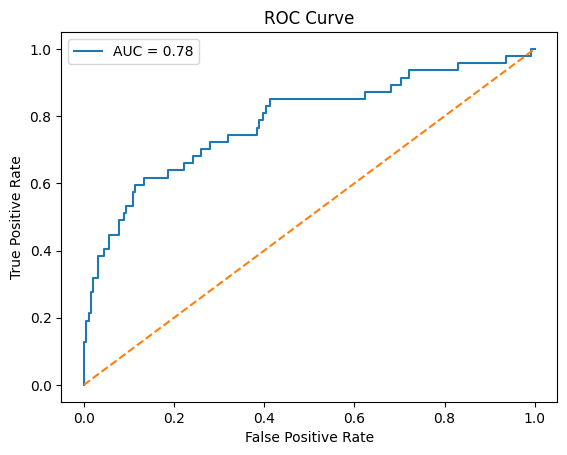

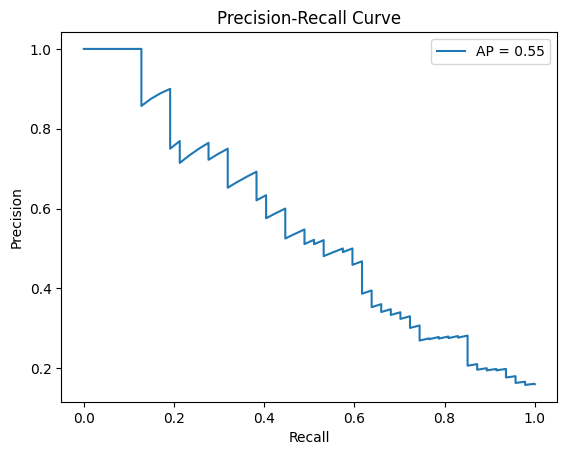

In [314]:
# Final RandomForestClassifier Model

final_rf = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', RandomForestClassifier(**rf_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1_macro','f1','precision', 'recall', 'roc_auc'])


#### XGBoost Classifier

##### Baseline Model

F1_MACRO : 0.6848437855777461 

F1_MACRO (std) : 0.03802038051837049 

F1 : 0.4501353909248646 

F1 (std) : 0.06373005447232992 

PRECISION : 0.6309523809523809 

PRECISION (std) : 0.13521210347143509 

RECALL : 0.3525044326241135 

RECALL (std) : 0.041576236134840704 

ROC_AUC : 0.7740234100067441 

ROC_AUC (std) : 0.018228507092616156 

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       270
           1       0.34      0.67      0.45        24

    accuracy                           0.87       294
   macro avg       0.65      0.78      0.69       294
weighted avg       0.92      0.87      0.89       294



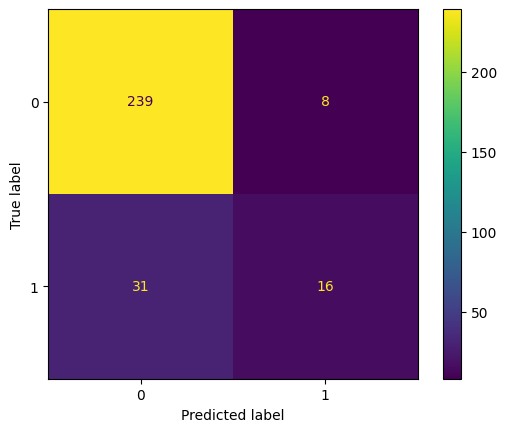

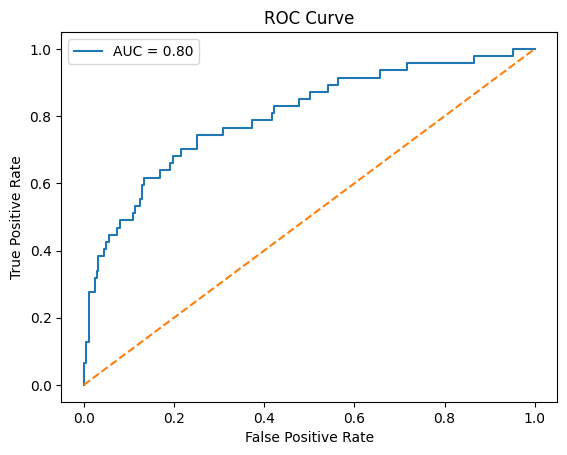

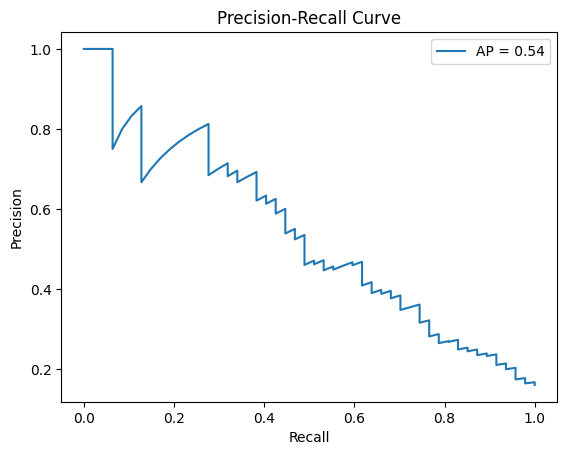

,feature,coefficient
2,Department_Sales,0.069767
9,JobRole_Research Scientist,0.066150
25,OverTime,0.062992
6,JobRole_Manager,0.048842
27,TotalWorkingYears,0.043287
20,StockOptionLevel,0.043170
12,MaritalStatus_Divorced,0.042473
17,JobLevel,0.041862
24,NumCompaniesWorked,0.037902
31,YearsWithCurrManager,0.034880


In [315]:
Pipe_xgbc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42))
    
])

model_metric(Pipe_xgbc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_xgbc)

##### XGBClassifier Balanced

F1_MACRO : 0.6963182168478889 

F1_MACRO (std) : 0.05151154734042925 

F1 : 0.4950109739781423 

F1 (std) : 0.0828359382704387 

PRECISION : 0.5425347222222222 

PRECISION (std) : 0.07145926971365758 

RECALL : 0.44148936170212766 

RECALL (std) : 0.07389597866728619 

ROC_AUC : 0.772384582162914 

ROC_AUC (std) : 0.033863012548672335 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       252
           1       0.51      0.57      0.54        42

    accuracy                           0.86       294
   macro avg       0.72      0.74      0.73       294
weighted avg       0.87      0.86      0.86       294



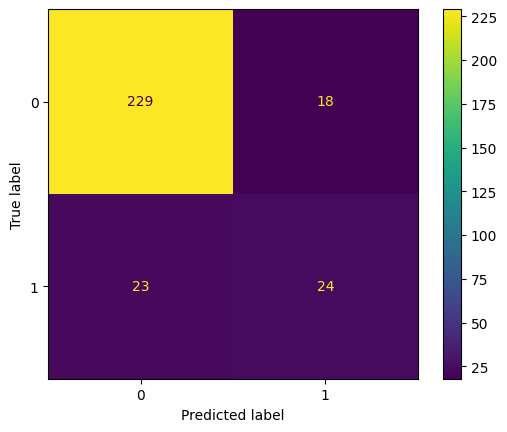

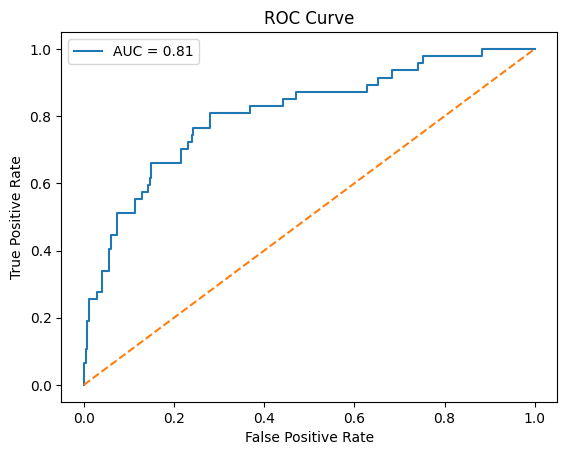

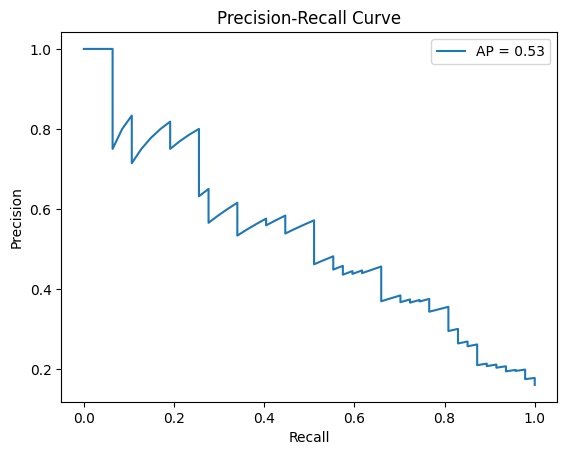

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best params: {'model__eval_metric': 'auc', 'model__gamma': 1, 'model__learning_rate': 0.1, 'model__max_depth': 15, 'model__n_estimators': 200, 'model__subsample': 0.5}
Best F1: 0.7245751023160261
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       247
           1       0.58      0.53      0.56        47

    accuracy                           0.86       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.86      0.86      0.86       294



,feature,coefficient
25,OverTime,0.101443
8,JobRole_Research Director,0.066541
2,Department_Sales,0.058312
31,YearsWithCurrManager,0.050290
20,StockOptionLevel,0.048396
3,JobRole_Healthcare Representative,0.045754
16,JobInvolvement,0.044655
6,JobRole_Manager,0.042878
12,MaritalStatus_Divorced,0.036304
7,JobRole_Manufacturing Director,0.035313


In [316]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

Pipe_xgbc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_xgbc = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_xgbc = GridSearchCV(
    estimator=Pipe_xgbc_balanced,
    param_grid=param_grid_xgbc,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_xgbc_balanced, ['f1_macro','f1', 'precision', 'recall', 'roc_auc'])

xgbc_fit = grid_search(grid_xgbc)

xgbc_best_params = grid_xgbc.best_params_

xgbc_clean_params = {k.split('__')[1]: v for k, v in xgbc_best_params.items()}

feature_importance_tree(Pipe_xgbc_balanced)



F1_MACRO : 0.7001363642845182 

F1_MACRO (std) : 0.03434858850735232 

F1 : 0.5212755205174853 

F1 (std) : 0.06786604715558786 

PRECISION : 0.5509724529346622 

PRECISION (std) : 0.09279706305795103 

RECALL : 0.5202792553191489 

RECALL (std) : 0.08241127730428614 

ROC_AUC : 0.7984336150160106 

ROC_AUC (std) : 0.02434749814223791 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       244
           1       0.57      0.54      0.56        50

    accuracy                           0.85       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.85      0.85      0.85       294



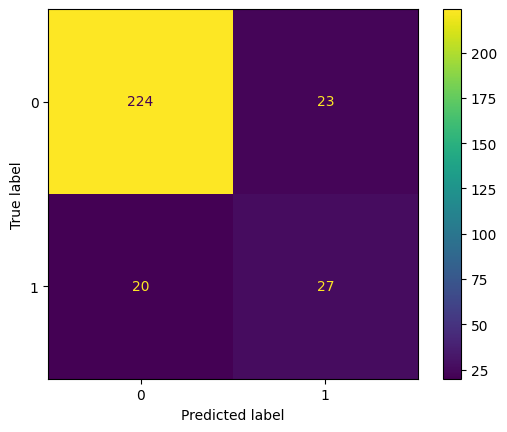

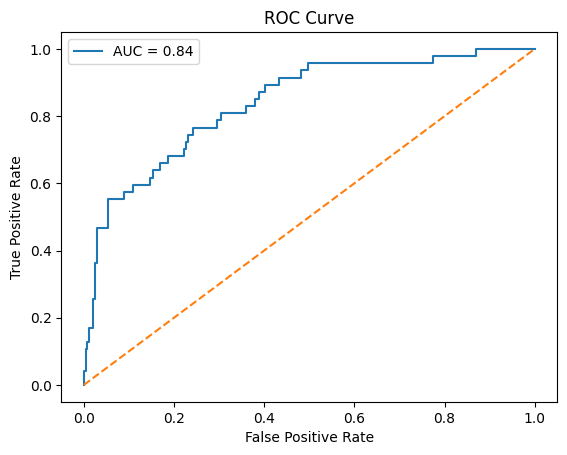

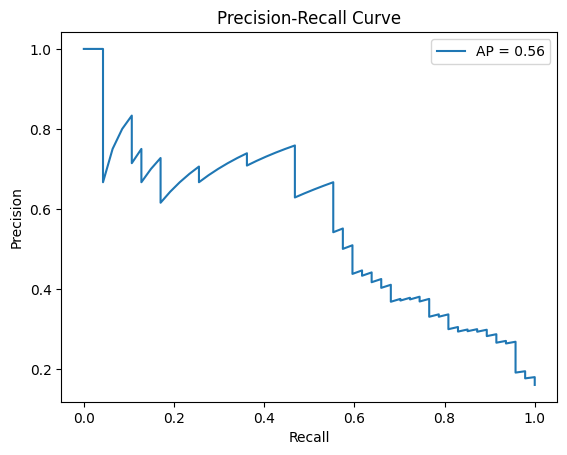

In [317]:
final_xgbc = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**xgbc_clean_params))
    
])

model_metric(final_xgbc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

#### LightGBM Classifier

[LightGBM] [Info] Number of positive: 143, number of negative: 739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162132 -> initscore=-1.642453
[LightGBM] [Info] Start training from score -1.642453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 143, number of negative: 739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data poin

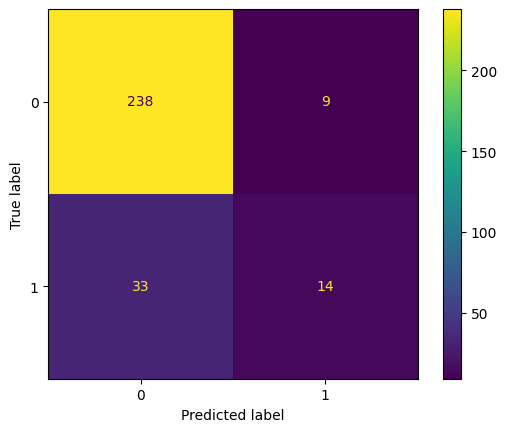

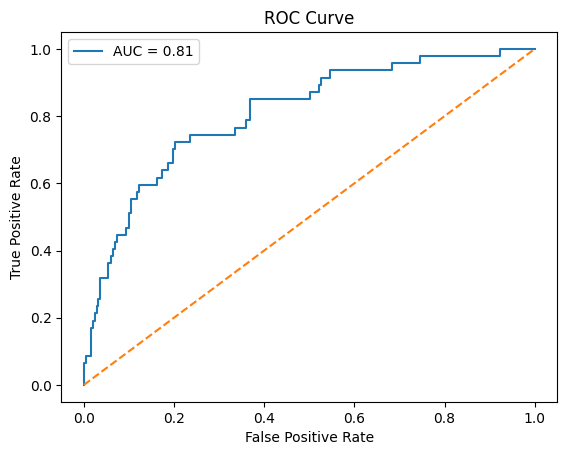

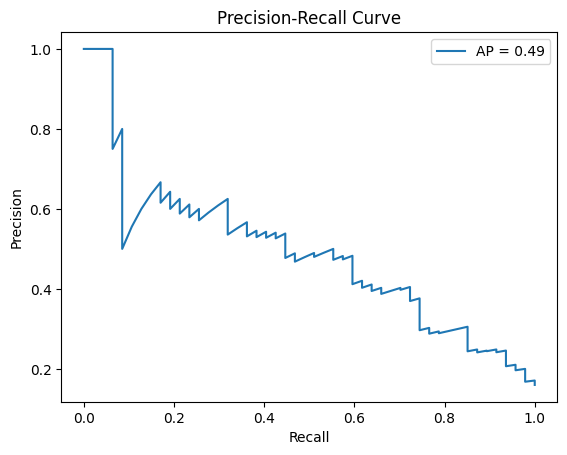

,feature,coefficient
22,Age,328
23,DistanceFromHome,269
27,TotalWorkingYears,211
32,Loyalty,198
26,PercentSalaryHike,191
31,YearsWithCurrManager,158
18,JobSatisfaction,135
24,NumCompaniesWorked,131
28,TrainingTimesLastYear,125
30,YearsSinceLastPromotion,122


In [318]:
Pipe_lgbm = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier(random_state=42))
    
])

model_metric(Pipe_lgbm, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_lgbm)

[LightGBM] [Info] Number of positive: 739, number of negative: 739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3901
[LightGBM] [Info] Number of data points in the train set: 1478, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 739, number of negative: 739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3918
[LightGBM] [Info] Number of data points in the train set: 1478, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 740, number of negative: 740
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ove

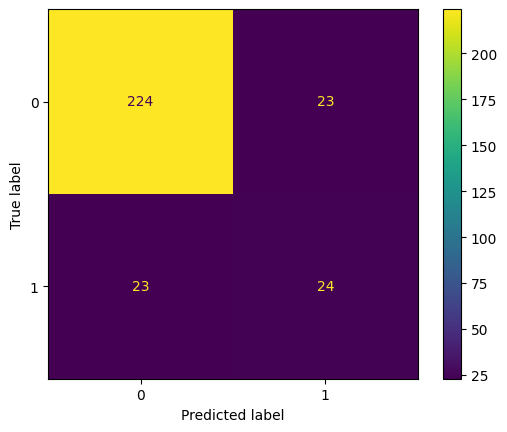

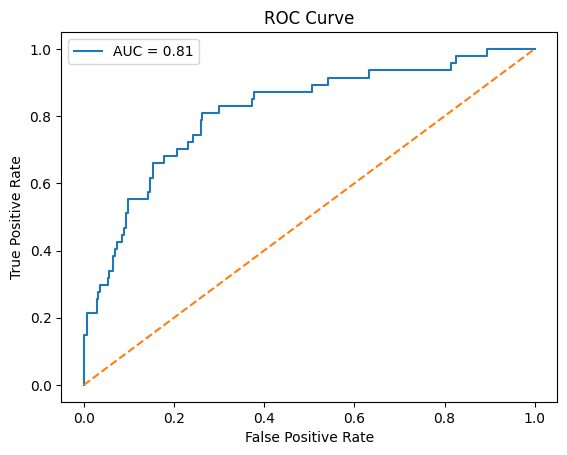

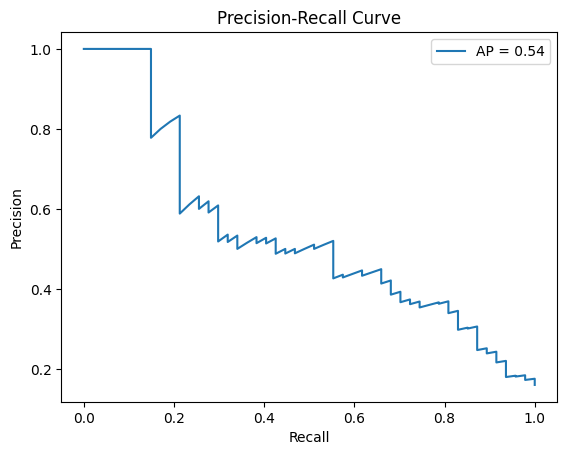

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4112
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: gamma
Best params: {'model__eval_metric': 'error', 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.5}
Best F1: 0.7173616929832753
              precision    recall  f1-score   support

           0       

,feature,coefficient
22,Age,247
23,DistanceFromHome,209
26,PercentSalaryHike,181
15,EnvironmentSatisfaction,179
18,JobSatisfaction,168
27,TotalWorkingYears,168
21,WorkLifeBalance,151
31,YearsWithCurrManager,149
24,NumCompaniesWorked,148
19,RelationshipSatisfaction,146


In [319]:
Pipe_lgbm_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_lgbm = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_lgbm = GridSearchCV(
    estimator=Pipe_lgbm_balanced,
    param_grid=param_grid_lgbm,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=0,
    error_score= 'raise'
)

model_metric(Pipe_lgbm_balanced, ['f1_macro','f1', 'precision', 'recall', 'roc_auc'])

lgbm_fit = grid_search(grid_lgbm)

lgbm_best_params = grid_lgbm.best_params_

lgbm_clean_params = {k.split('__')[1]: v for k, v in lgbm_best_params.items()}

feature_importance_tree(Pipe_lgbm_balanced)




F1_MACRO : 0.7172819926030768 

F1_MACRO (std) : 0.04341616164842314 

F1 : 0.516740403729423 

F1 (std) : 0.059381574839544836 

PRECISION : 0.544640218676123 

PRECISION (std) : 0.11416438769440122 

RECALL : 0.4576684397163121 

RECALL (std) : 0.031168156495080798 

ROC_AUC : 0.7880161039461954 

ROC_AUC (std) : 0.024212061401123874 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       254
           1       0.51      0.60      0.55        40

    accuracy                           0.87       294
   macro avg       0.72      0.75      0.74       294
weighted avg       0.88      0.87      0.87       294



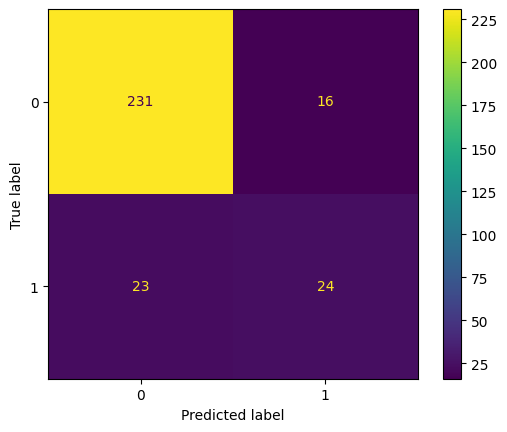

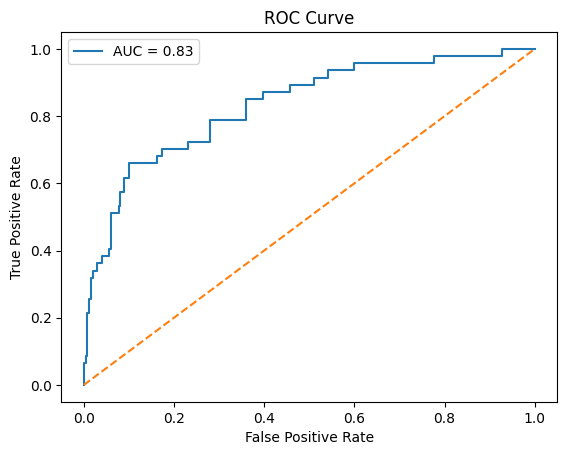

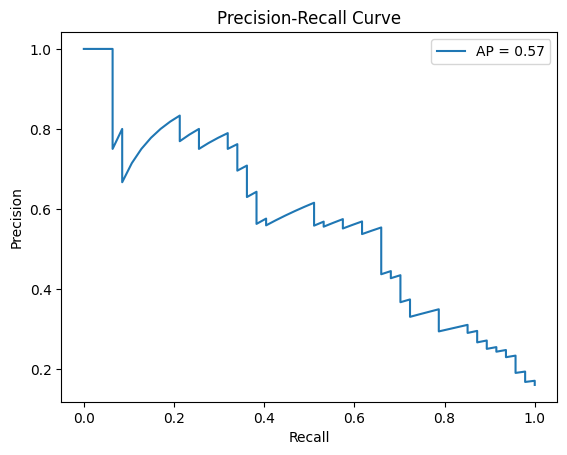

In [320]:
final_lgbm = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lgbm', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**lgbm_clean_params))
    
])

model_metric(final_lgbm, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

#### Support Vector Classifier

F1_MACRO : 0.7044101452121287 

F1_MACRO (std) : 0.027888513305128853 

F1 : 0.4828164228986177 

F1 (std) : 0.05335170183812757 

PRECISION : 0.7107526881720431 

PRECISION (std) : 0.13608417953431717 

RECALL : 0.3782136524822695 

RECALL (std) : 0.07049361921069747 

ROC_AUC : 0.8347364559777586 

ROC_AUC (std) : 0.014937330021369325 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       267
           1       0.38      0.67      0.49        27

    accuracy                           0.87       294
   macro avg       0.67      0.78      0.71       294
weighted avg       0.91      0.87      0.89       294



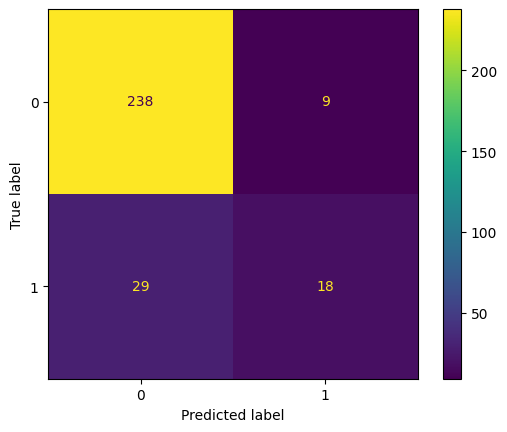

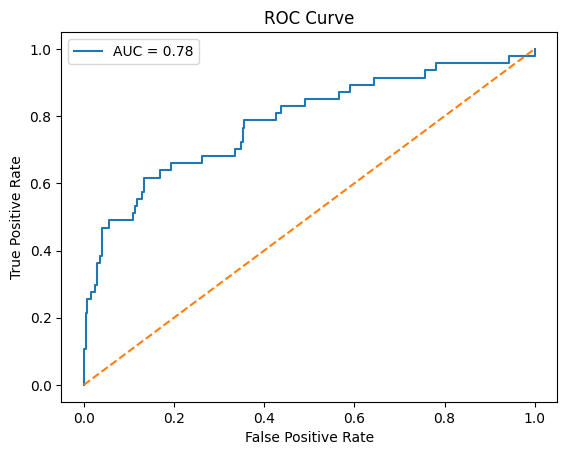

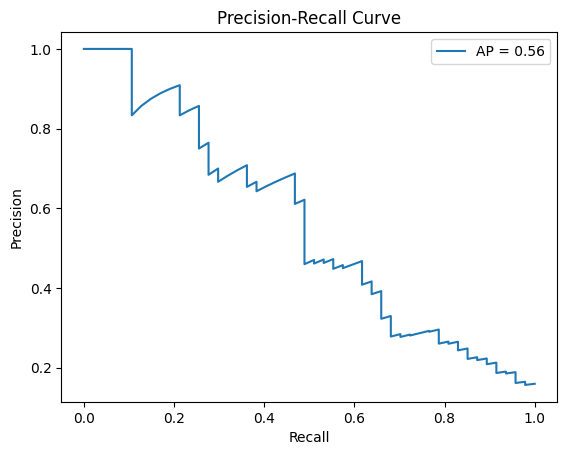

,feature,coefficient
25,OverTime,0.531835
24,NumCompaniesWorked,0.366400
30,YearsSinceLastPromotion,0.346870
31,YearsWithCurrManager,-0.311057
22,Age,-0.304931
29,YearsInCurrentRole,-0.302640
15,EnvironmentSatisfaction,-0.297341
8,JobRole_Research Director,-0.281586
11,JobRole_Sales Representative,0.264039
16,JobInvolvement,-0.252083


In [321]:
Pipe_svc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', SVC(random_state=42, probability=True, kernel='linear'))
    
])

model_metric(Pipe_svc, ['f1_macro', 'f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_svc)

F1_MACRO : 0.6929865578531196 

F1_MACRO (std) : 0.01378055897269937 

F1 : 0.4889717772070713 

F1 (std) : 0.016324510901385696 

PRECISION : 0.4568920519402569 

PRECISION (std) : 0.04972569681870983 

RECALL : 0.5044326241134751 

RECALL (std) : 0.08026416263990734 

ROC_AUC : 0.7796876043193522 

ROC_AUC (std) : 0.017741553270490835 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       237
           1       0.53      0.44      0.48        57

    accuracy                           0.82       294
   macro avg       0.70      0.67      0.68       294
weighted avg       0.80      0.82      0.81       294



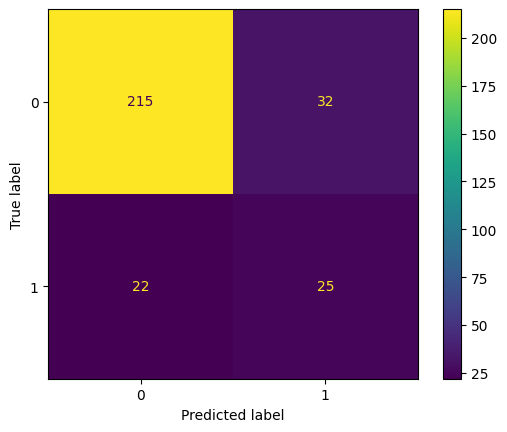

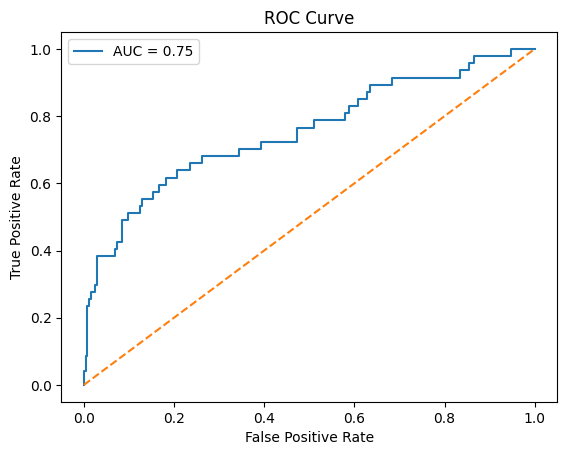

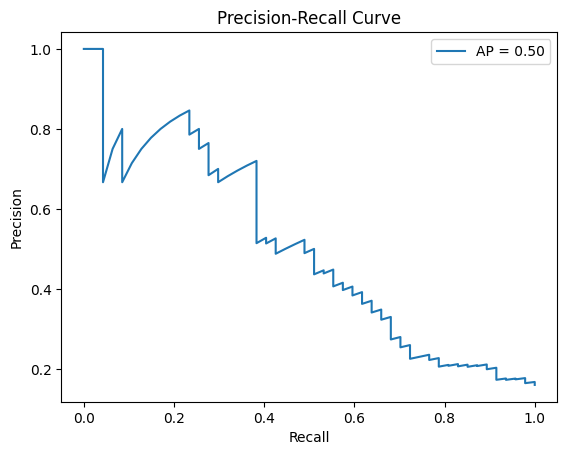

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
Best params: {'model__C': 0.001, 'model__class_weight': None, 'model__gamma': 0.3, 'model__kernel': 'poly', 'model__max_iter': 600}
Best F1: 0.6950237448258464
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       247
           1       0.44      0.51      0.48        47

    accuracy                           0.82       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.83      0.82      0.82       294



In [322]:
Pipe_svc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', SVC(random_state=42, probability=True))
    
])

param_grid_svc = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__class_weight': [None, 'balanced'],
    'model__max_iter' : [100, 200, 300, 400, 500, 600],
    'model__gamma' : [0.3],
    'model__kernel' : ['linear','poly', 'rbf', 'sigmoid', 'precomputed']
}

scoring = {
    'f1_macro' : 'f1_macro',
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_svc = GridSearchCV(
    estimator=Pipe_svc_balanced,
    param_grid=param_grid_svc,
    cv=cv,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_svc_balanced, ['f1_macro','f1','precision', 'recall', 'roc_auc'])

svc_fit = grid_search(grid_svc)

svc_best_params = grid_svc.best_params_

svc_clean_params = {k.split('__')[1]: v for k, v in svc_best_params.items()}


F1_MACRO : 0.68920139145382 

F1_MACRO (std) : 0.02529873445529639 

F1 : 0.4730729742376304 

F1 (std) : 0.03941009223933996 

RECALL : 0.504654255319149 

RECALL (std) : 0.08788480786159561 

PRECISION : 0.48962798788014805 

PRECISION (std) : 0.07717752436484507 

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       238
           1       0.53      0.45      0.49        56

    accuracy                           0.82       294
   macro avg       0.70      0.68      0.69       294
weighted avg       0.81      0.82      0.81       294



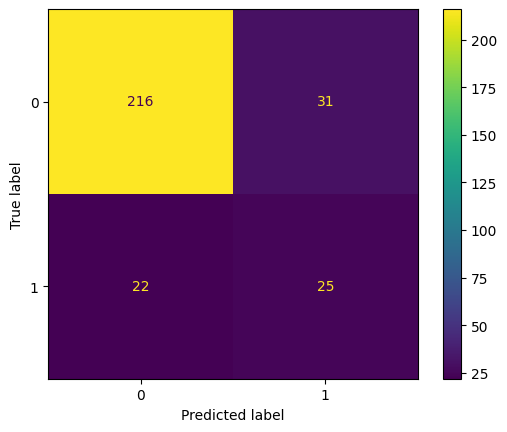

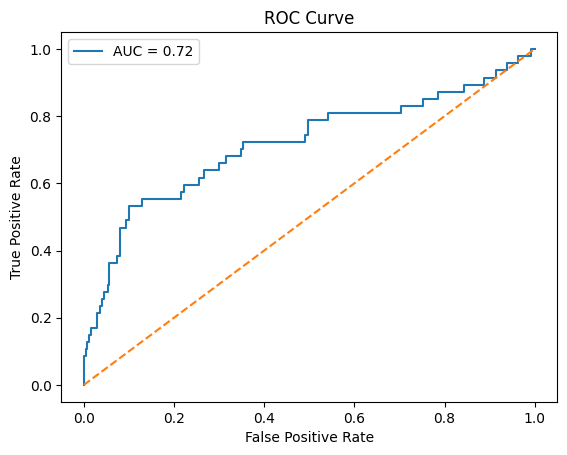

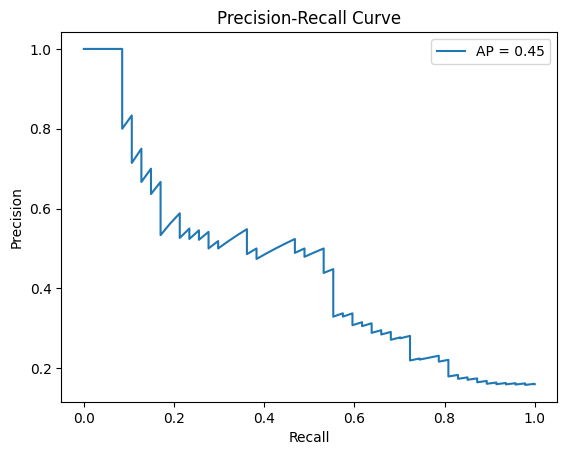

In [323]:
final_svc = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('svc', SVC(random_state=42, probability=True, **svc_clean_params))
    
])


model_metric(final_svc, ['f1_macro', 'f1', 'recall', 'precision'])


#### Model Ensemble

F1_MACRO : 0.7336497917599485 

F1_MACRO (std) : 0.04260800132680014 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       240
           1       0.62      0.54      0.57        54

    accuracy                           0.85       294
   macro avg       0.76      0.73      0.74       294
weighted avg       0.85      0.85      0.85       294



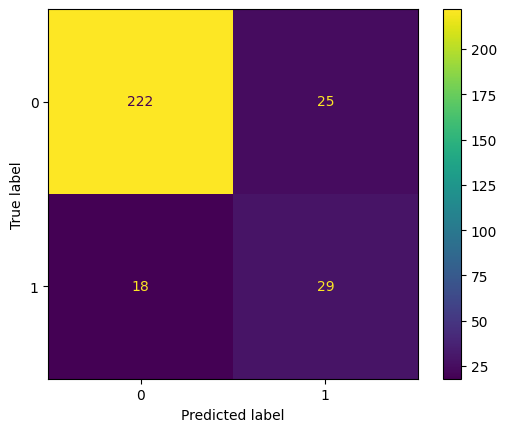

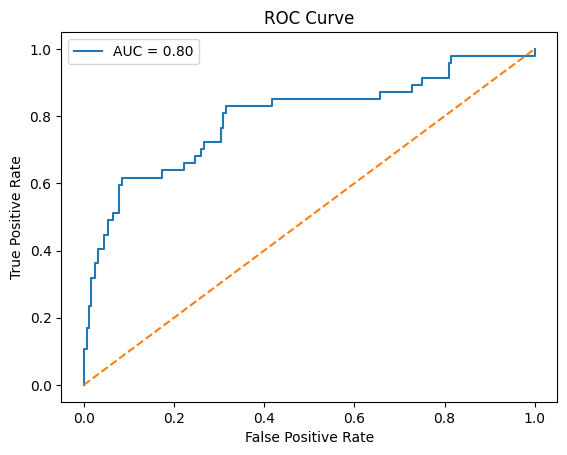

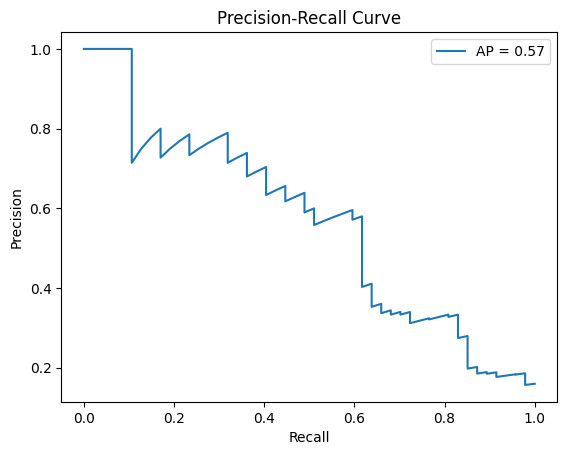

In [339]:
ensemble = VotingClassifier(
    
    estimators=[
        ('lr', final_lr),
        ('lgbm', final_lgbm),
        ('svc', final_svc)
    ],
    voting='soft'  
)

model_metric(ensemble, ['f1_macro'])

In [329]:
def voters_combo(first, second, third):
    ensemble = VotingClassifier(
    
        estimators=[
            ('first', first),
            ('second', second),
            ('third', third)
        ],
        voting='soft'  
    )

    return model_metric(ensemble, ['f1_macro'])


F1_MACRO : 0.7172876702649226 

F1_MACRO (std) : 0.023166522781165738 

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       243
           1       0.60      0.55      0.57        51

    accuracy                           0.86       294
   macro avg       0.75      0.74      0.74       294
weighted avg       0.85      0.86      0.85       294



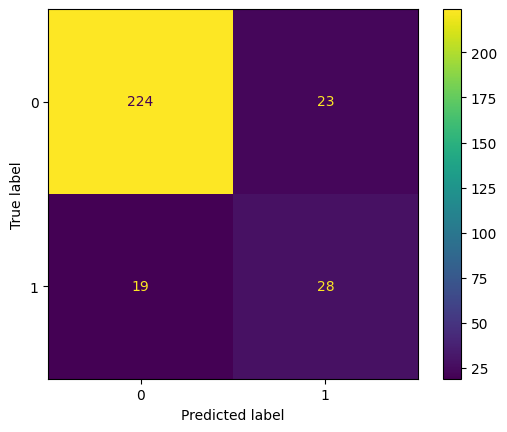

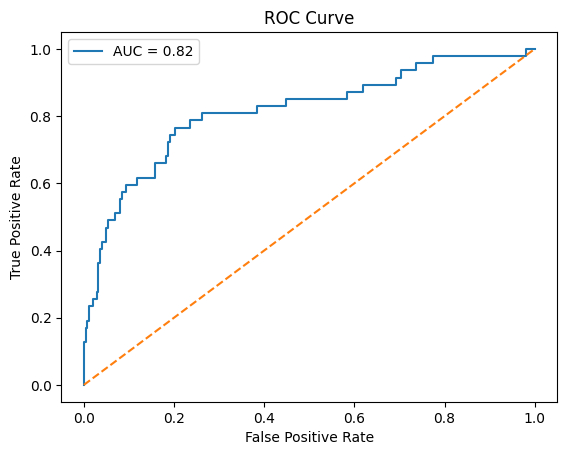

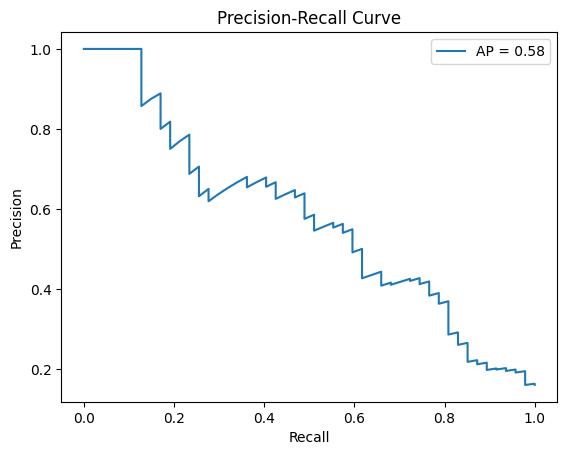

In [338]:
voters_combo(final_lr, final_lgbm, final_xgbc)